<p><img alt="UdeA logo" height="140px" src="https://upload.wikimedia.org/wikipedia/commons/archive/f/fb/20161010213812%21Escudo-UdeA.svg" align="left" hspace="10px" vspace="0px"></p>
<div align="center">
  
<h1> <b> Laboratorio 1 Aprendizaje estadistico, Dataframes</b> </h1>

</div>

<!-- <br> le permite hacer espacios -->
<br>

<hr size=10 noshade color="green">
<p>


<div align="right">       

<h3><i> <b> Ortíz Campo Jose David</b> <br>  
Universidad de Antioquia <br>
Instituto de Física  <br>
jose.ortizc@udea.edu.co

</i></h3>
</div>


---

Para el siguiente trabajo hay que tener en cuenta que se divide en 2 partes, una de estas fué trabajada en clase que es la parte1(sin emabrgo perdí el progreso, así que puede que me falte algo de la pregunta3, ya que la profe dijo que hicieramos series de tiempo, pero no recuerdo si pidió algo adicional; así, puede que mi memoria me falle) Sin embargo, realizaré textualmente lo que se pide en el notebook Laboratorio1.

Por otra parte es importante que la persona que vaya a ejecutar este notebook debe tener en cuenta que se debe de instalar un numpy compatible con fitter. Yo lo corrí en Colab y me funcionó, sin embargo al intentarlo realizar en mi VSC con un entorno me resultaron inconvenientes, así que lo prudente seria correr el codigo desde colab.

Por ultimo y no menos importante, hay que tener en cuenta 2 cosas; la primera es que el codigo se debe ejecutar de modo secuencial, esto debido a que hay algunos dataframe que se llaman igual digamos "df" o "df1" tanto en la parte 1 como en la parte 2. Lo segundo es que hay una celda que en ocasiones se debe de ejecutar 2 veces, que es en la que se instala una versión compatible con numpy. Es decir la primera linea de codigo.

# Parte 1

In [1]:
!pip install numpy==1.23.5

In [2]:
!pip install fitter

In [3]:
#@title importacion de librerias

import pandas as pd
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## Pregunta 1

1.Leer los datos desde una página web.

In [4]:
df=pd.read_csv('https://raw.githubusercontent.com/hernansalinas/Curso_aprendizaje_estadistico/main/datasets/Pandas_data_historical_dataEURUSD.csv')
df

Unnamed: 0                 time     open     high      low    close  \
0              0  2022-07-25 13:00:00  1.02427  1.02430  1.02145  1.02345   
1              1  2022-07-25 14:00:00  1.02345  1.02578  1.02288  1.02299   
2              2  2022-07-25 15:00:00  1.02303  1.02476  1.02230  1.02457   
3              3  2022-07-25 16:00:00  1.02454  1.02548  1.02355  1.02485   
4              4  2022-07-25 17:00:00  1.02485  1.02514  1.02030  1.02181   
...          ...                  ...      ...      ...      ...      ...   
4995        4995  2023-05-12 19:00:00  1.08552  1.08569  1.08485  1.08514   
4996        4996  2023-05-12 20:00:00  1.08516  1.08567  1.08502  1.08546   
4997        4997  2023-05-12 21:00:00  1.08546  1.08546  1.08487  1.08531   
4998        4998  2023-05-12 22:00:00  1.08531  1.08549  1.08506  1.08518   
4999        4999  2023-05-12 23:00:00  1.08521  1.08522  1.08478  1.08494   

      tick_volume  spread  real_volume  MeanCloseOpen  Diff_Close  Diff_Open  \
0            3927       8            0       1.023860    -0.00046   -0.00082   
1            5344       8            0       1.023220    -0.00046   -0.00082   
2            5524       8            0       1.023800     0.00158   -0.00042   
3            5234       8            0       1.024695     0.00028    0.00151   
4            9031       7            0       1.023330    -0.00304    0.00031   
...           ...     ...          ...            ...         ...        ...   
4995         2275       8            0       1.085330    -0.00038   -0.00071   
4996         1676       8            0       1.085310     0.00032   -0.00036   
4997         1828       8            0       1.085385    -0.00015    0.00030   
4998         1374       8            0       1.085245    -0.00013   -0.00015   
4999          706       8            0       1.085075    -0.00024   -0.00010   

      Diff_MeanCloseOpen  
0              -0.000640  
1              -0.000640  
2               0.000580  
3               0.000895  
4              -0.001365  
...                  ...  
4995           -0.000545  
4996           -0.000020  
4997            0.000075  
4998           -0.000140  
4999           -0.000170  

[5000 rows x 13 columns]

## Pregunta 2


2.Definir como indice la columna time.



Para realizar esto primero realizaré un cambio de nombre de columnas a PascalCase ya que luego lo necesitaré para el punto 5

In [5]:
df.columns

Index(['Unnamed: 0', 'time', 'open', 'high', 'low', 'close', 'tick_volume',
       'spread', 'real_volume', 'MeanCloseOpen', 'Diff_Close', 'Diff_Open',
       'Diff_MeanCloseOpen'],
      dtype='object')

In [6]:
def pascal_case(s):
    palabra=''
    palabras=s.split('_')
    for i in palabras:
        if i[0].isupper():
            palabra+=i
        else:
            palabra+=i.capitalize()
    return palabra
columnas_pascal=[pascal_case(i) for i in df.columns]
columnas_pascal

['Unnamed: 0',
 'Time',
 'Open',
 'High',
 'Low',
 'Close',
 'TickVolume',
 'Spread',
 'RealVolume',
 'MeanCloseOpen',
 'DiffClose',
 'DiffOpen',
 'DiffMeanCloseOpen']

In [7]:
df.columns=columnas_pascal
df.columns

Index(['Unnamed: 0', 'Time', 'Open', 'High', 'Low', 'Close', 'TickVolume',
       'Spread', 'RealVolume', 'MeanCloseOpen', 'DiffClose', 'DiffOpen',
       'DiffMeanCloseOpen'],
      dtype='object')

In [8]:
df.set_index('Time',inplace=True)

In [9]:
df

Unnamed: 0     Open     High      Low    Close  \
Time                                                                  
2022-07-25 13:00:00           0  1.02427  1.02430  1.02145  1.02345   
2022-07-25 14:00:00           1  1.02345  1.02578  1.02288  1.02299   
2022-07-25 15:00:00           2  1.02303  1.02476  1.02230  1.02457   
2022-07-25 16:00:00           3  1.02454  1.02548  1.02355  1.02485   
2022-07-25 17:00:00           4  1.02485  1.02514  1.02030  1.02181   
...                         ...      ...      ...      ...      ...   
2023-05-12 19:00:00        4995  1.08552  1.08569  1.08485  1.08514   
2023-05-12 20:00:00        4996  1.08516  1.08567  1.08502  1.08546   
2023-05-12 21:00:00        4997  1.08546  1.08546  1.08487  1.08531   
2023-05-12 22:00:00        4998  1.08531  1.08549  1.08506  1.08518   
2023-05-12 23:00:00        4999  1.08521  1.08522  1.08478  1.08494   

                     TickVolume  Spread  RealVolume  MeanCloseOpen  DiffClose  \
Time                                                                            
2022-07-25 13:00:00        3927       8           0       1.023860   -0.00046   
2022-07-25 14:00:00        5344       8           0       1.023220   -0.00046   
2022-07-25 15:00:00        5524       8           0       1.023800    0.00158   
2022-07-25 16:00:00        5234       8           0       1.024695    0.00028   
2022-07-25 17:00:00        9031       7           0       1.023330   -0.00304   
...                         ...     ...         ...            ...        ...   
2023-05-12 19:00:00        2275       8           0       1.085330   -0.00038   
2023-05-12 20:00:00        1676       8           0       1.085310    0.00032   
2023-05-12 21:00:00        1828       8           0       1.085385   -0.00015   
2023-05-12 22:00:00        1374       8           0       1.085245   -0.00013   
2023-05-12 23:00:00         706       8           0       1.085075   -0.00024   

                     DiffOpen  DiffMeanCloseOpen  
Time                                              
2022-07-25 13:00:00  -0.00082          -0.000640  
2022-07-25 14:00:00  -0.00082          -0.000640  
2022-07-25 15:00:00  -0.00042           0.000580  
2022-07-25 16:00:00   0.00151           0.000895  
2022-07-25 17:00:00   0.00031          -0.001365  
...                       ...                ...  
2023-05-12 19:00:00  -0.00071          -0.000545  
2023-05-12 20:00:00  -0.00036          -0.000020  
2023-05-12 21:00:00   0.00030           0.000075  
2023-05-12 22:00:00  -0.00015          -0.000140  
2023-05-12 23:00:00  -0.00010          -0.000170  

[5000 rows x 12 columns]

## Pregunta 3

3. Obtenga información del data frame.

Para esto se pueden realizar distintas aproximaciónes, se puede usar los usuales df.head(), df.tail(), df.info() en clase se propuso que realizaramos una serie de tiempo además de histogramas para ver comportamientos y ver si habia un cierto tipo de periodicidad, sin emabargo este histograma es preceisamente el de la pregunta 6.

In [10]:
df.head()

Unnamed: 0     Open     High      Low    Close  \
Time                                                                  
2022-07-25 13:00:00           0  1.02427  1.02430  1.02145  1.02345   
2022-07-25 14:00:00           1  1.02345  1.02578  1.02288  1.02299   
2022-07-25 15:00:00           2  1.02303  1.02476  1.02230  1.02457   
2022-07-25 16:00:00           3  1.02454  1.02548  1.02355  1.02485   
2022-07-25 17:00:00           4  1.02485  1.02514  1.02030  1.02181   

                     TickVolume  Spread  RealVolume  MeanCloseOpen  DiffClose  \
Time                                                                            
2022-07-25 13:00:00        3927       8           0       1.023860   -0.00046   
2022-07-25 14:00:00        5344       8           0       1.023220   -0.00046   
2022-07-25 15:00:00        5524       8           0       1.023800    0.00158   
2022-07-25 16:00:00        5234       8           0       1.024695    0.00028   
2022-07-25 17:00:00        9031       7           0       1.023330   -0.00304   

                     DiffOpen  DiffMeanCloseOpen  
Time                                              
2022-07-25 13:00:00  -0.00082          -0.000640  
2022-07-25 14:00:00  -0.00082          -0.000640  
2022-07-25 15:00:00  -0.00042           0.000580  
2022-07-25 16:00:00   0.00151           0.000895  
2022-07-25 17:00:00   0.00031          -0.001365

In [11]:
df.tail()

Unnamed: 0     Open     High      Low    Close  \
Time                                                                  
2023-05-12 19:00:00        4995  1.08552  1.08569  1.08485  1.08514   
2023-05-12 20:00:00        4996  1.08516  1.08567  1.08502  1.08546   
2023-05-12 21:00:00        4997  1.08546  1.08546  1.08487  1.08531   
2023-05-12 22:00:00        4998  1.08531  1.08549  1.08506  1.08518   
2023-05-12 23:00:00        4999  1.08521  1.08522  1.08478  1.08494   

                     TickVolume  Spread  RealVolume  MeanCloseOpen  DiffClose  \
Time                                                                            
2023-05-12 19:00:00        2275       8           0       1.085330   -0.00038   
2023-05-12 20:00:00        1676       8           0       1.085310    0.00032   
2023-05-12 21:00:00        1828       8           0       1.085385   -0.00015   
2023-05-12 22:00:00        1374       8           0       1.085245   -0.00013   
2023-05-12 23:00:00         706       8           0       1.085075   -0.00024   

                     DiffOpen  DiffMeanCloseOpen  
Time                                              
2023-05-12 19:00:00  -0.00071          -0.000545  
2023-05-12 20:00:00  -0.00036          -0.000020  
2023-05-12 21:00:00   0.00030           0.000075  
2023-05-12 22:00:00  -0.00015          -0.000140  
2023-05-12 23:00:00  -0.00010          -0.000170

In [12]:
df.describe()

Unnamed: 0         Open         High          Low        Close  \
count  5000.000000  5000.000000  5000.000000  5000.000000  5000.000000   
mean   2499.500000     1.043891     1.044815     1.042991     1.043906   
std    1443.520003     0.041135     0.040991     0.041263     0.041135   
min       0.000000     0.953910     0.955930     0.953570     0.953910   
25%    1249.750000     1.002718     1.003507     1.001715     1.002705   
50%    2499.500000     1.055670     1.056795     1.054960     1.055700   
75%    3749.250000     1.078940     1.079582     1.078222     1.078947   
max    4999.000000     1.108470     1.109530     1.108050     1.108500   

         TickVolume       Spread  RealVolume  MeanCloseOpen    DiffClose  \
count   5000.000000  5000.000000      5000.0    5000.000000  5000.000000   
mean    3690.249400     8.981600         0.0       1.043898     0.000012   
std     2800.488505     5.785115         0.0       0.041129     0.001400   
min       85.000000     0.000000         0.0       0.954735    -0.013970   
25%     1738.750000     8.000000         0.0       1.002648    -0.000580   
50%     2999.500000     8.000000         0.0       1.055712    -0.000005   
75%     4861.000000     8.000000         0.0       1.078955     0.000620   
max    23708.000000   183.000000         0.0       1.108280     0.017340   

          DiffOpen  DiffMeanCloseOpen  
count  5000.000000        5000.000000  
mean      0.000012           0.000012  
std       0.001404           0.000978  
min      -0.014010          -0.007260  
25%      -0.000600          -0.000425  
50%       0.000000           0.000005  
75%       0.000612           0.000430  
max       0.017420           0.010780

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5000 entries, 2022-07-25 13:00:00 to 2023-05-12 23:00:00
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         5000 non-null   int64  
 1   Open               5000 non-null   float64
 2   High               5000 non-null   float64
 3   Low                5000 non-null   float64
 4   Close              5000 non-null   float64
 5   TickVolume         5000 non-null   int64  
 6   Spread             5000 non-null   int64  
 7   RealVolume         5000 non-null   int64  
 8   MeanCloseOpen      5000 non-null   float64
 9   DiffClose          5000 non-null   float64
 10  DiffOpen           5000 non-null   float64
 11  DiffMeanCloseOpen  5000 non-null   float64
dtypes: float64(8), int64(4)
memory usage: 507.8+ KB


Según el head() la serie de datos tomados empezaron desde el 25 de julio del 2022 a la 1 de la tarde además de que la apertura fué de 1.02427 y su valor mas alto de 1.02430 mostrando así poca fluctuación desde su inicio en su alza y su valor mas bajo fué de 1.02145 mostrando así que si tuvo un valle muy pronunciado y con el cierre que fué de un valor de 1.02345 muestra que en algún punto volvio a estabilizarse luego de dicha recaida. Se puede hacer el mismo analsis para los otros valores de las primeras 5 filas mostradas por el head


Según el df.tail() se muestra que fueron tomados 4999 datos y que el ultimo dato fué tomado el 5 de diciembre del 2023 mostrando así que se hizo un muestreo durante aproximadamente 2 años. Analogamente al head() se puede extraer informacion acerca de la apertura, el valor mas alto, bajo y su cierre.

Del df.describe() se observan el numero de datos, la media de todos los datos(en cada una de sus caracteristicas, es decir open, high ...), desviacion estandar de todos los datos, el minimo maximo y los datos que segregan los percentiles


del df.info() se obtiene informacion de las columnas, en particular se extrae el hecho de cuandos valores non tiene, y pues se observa que no hay ninguna columna que tenga algún valor nulo. Adicional se describe el typo de dato que se encuentra en las columnas, y se observa uqe la mayoria son Reales o enteros,  a excepcion obiamente de la columna Time que es de tipo Objeto

También se pueden realizar series de tiempo. Por ejemplo para el cierre

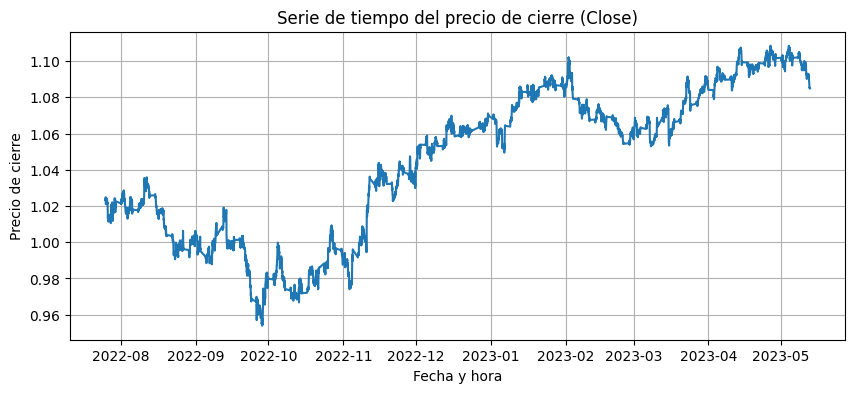

In [14]:
df.index = pd.to_datetime(df.index)

plt.figure(figsize=(10, 4))
plt.plot(df['Close'])
plt.title("Serie de tiempo del precio de cierre (Close)")
plt.xlabel("Fecha y hora")
plt.ylabel("Precio de cierre")
plt.grid(True)
plt.show()

Analogamente Se pueden sacar para las demás y ver si hay alguna periodicidad.

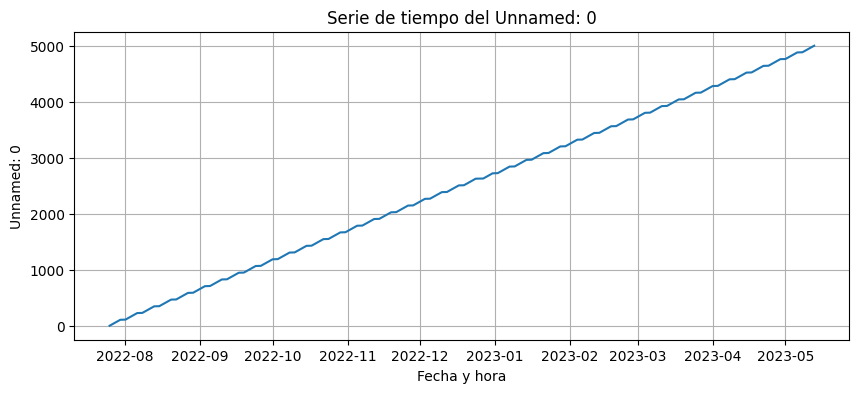

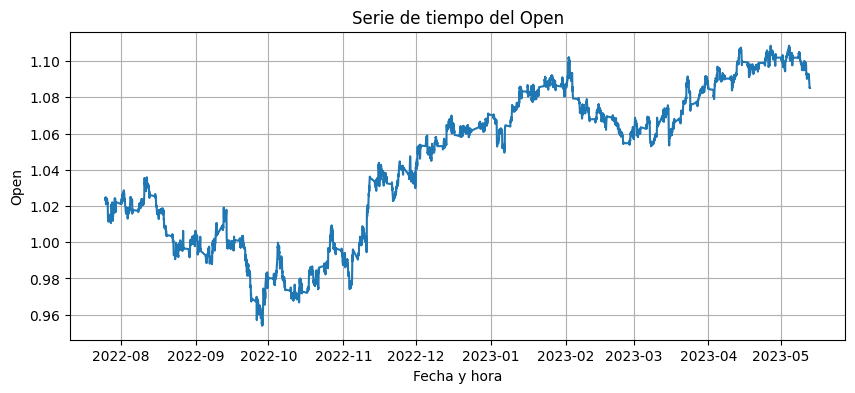

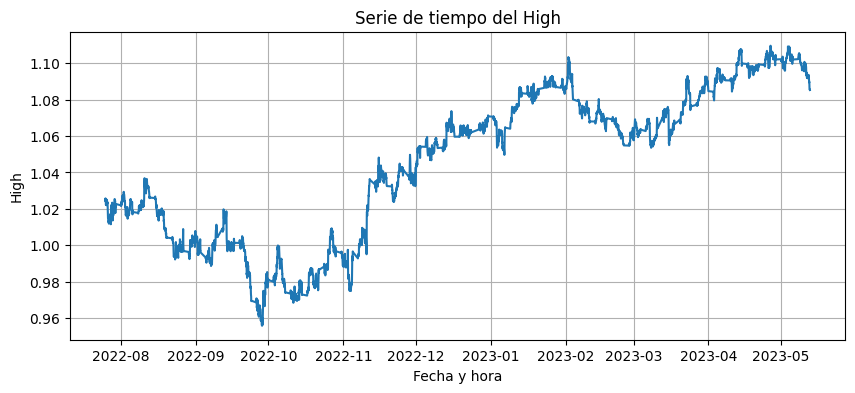

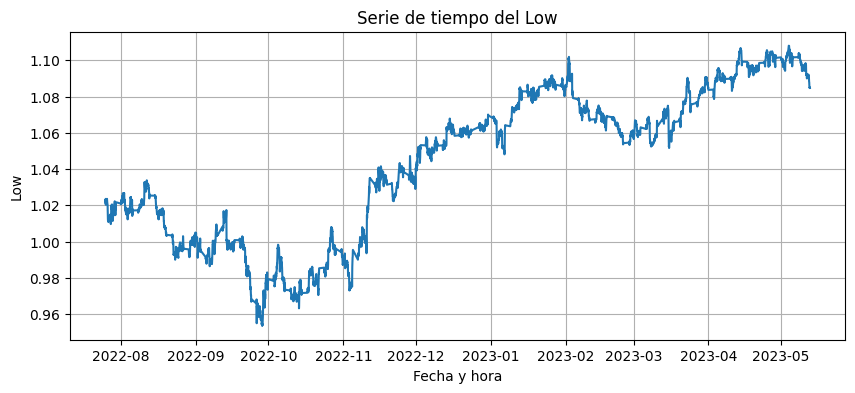

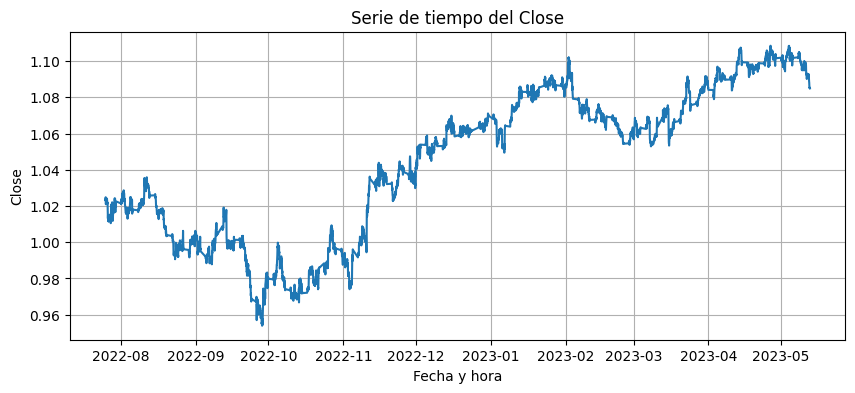

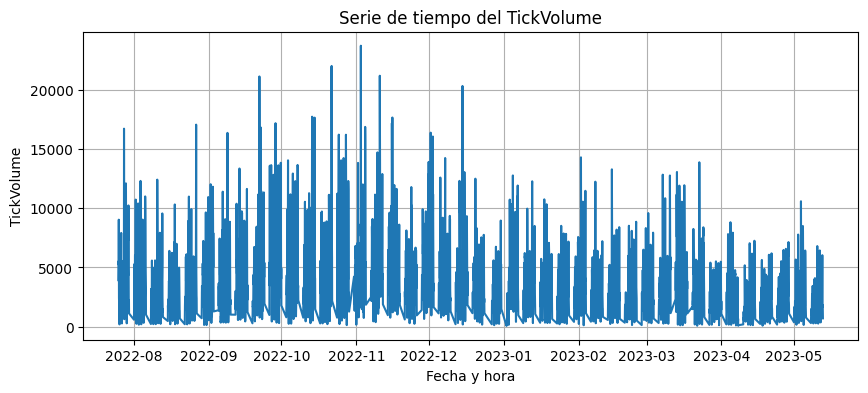

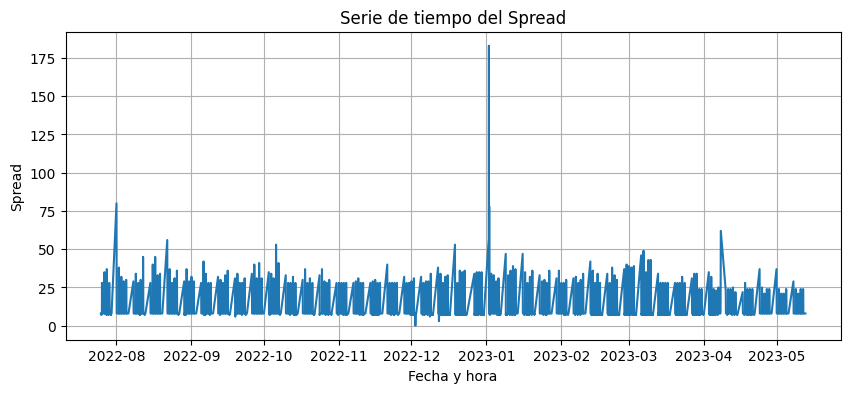

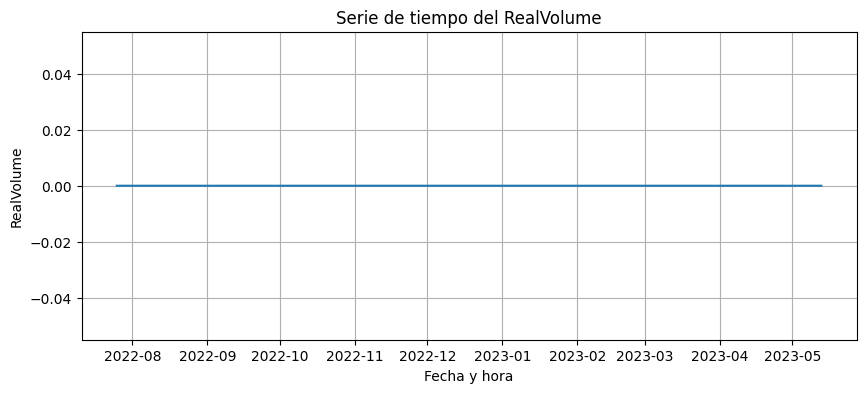

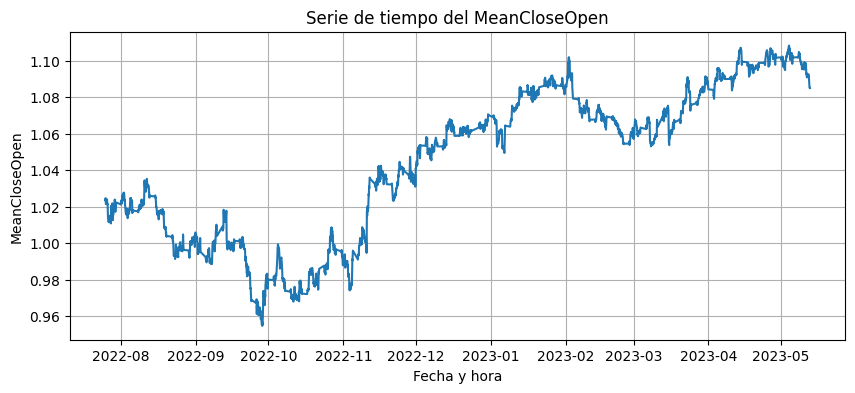

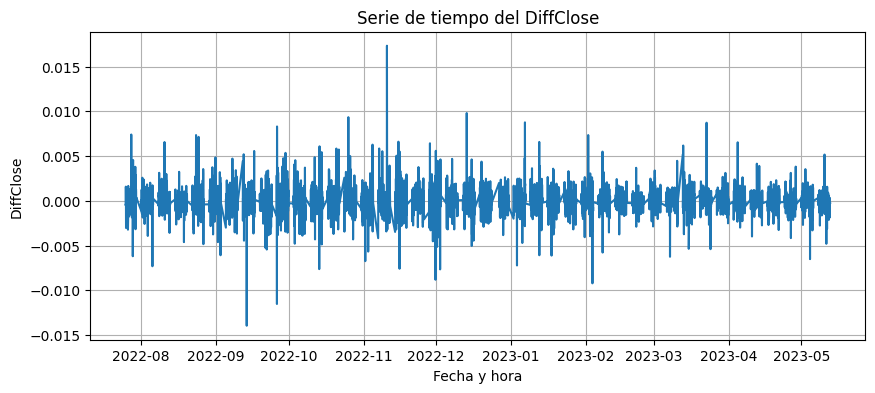

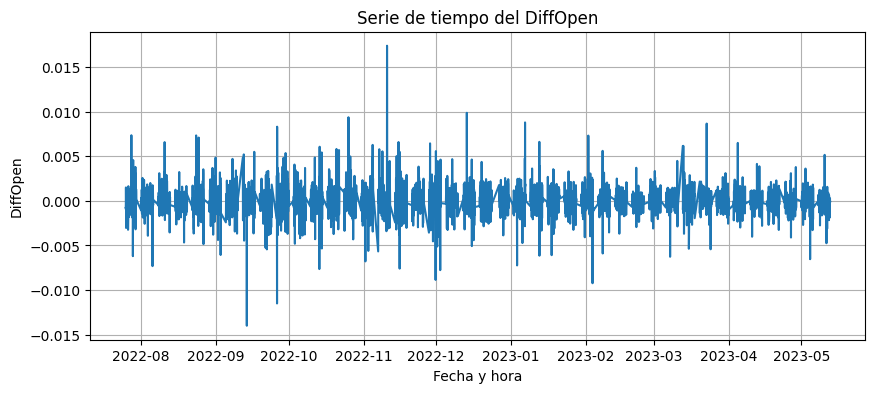

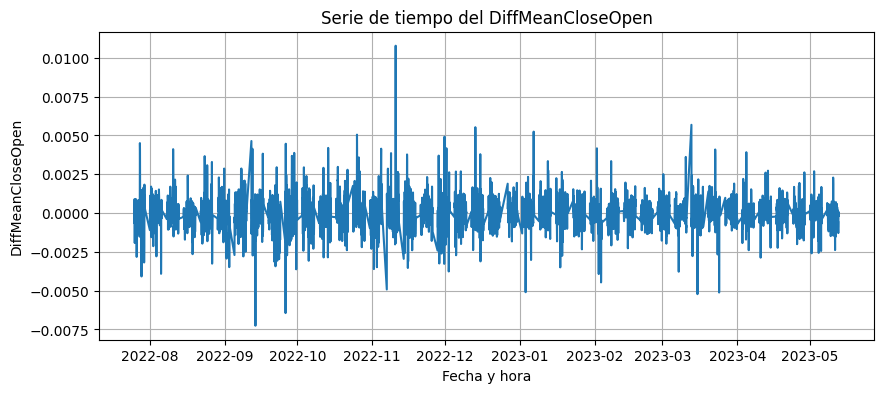

In [15]:
for i in df.columns:
  plt.figure(figsize=(10, 4))
  plt.plot(df[i])
  plt.title(f"Serie de tiempo del {i}")
  plt.xlabel("Fecha y hora")
  plt.ylabel(i)
  plt.grid(True)
  plt.show()

Sin embargo noto que efectivamente hay algunas a las cuales no tiene sentido alguno sacar su serie de tiempo como por ejemplo a RealVolume

## Pregunta 4

4.Determine si hay null, nan en el data frame



Una forma eficiente de hacerlo es apoyarme de la respuesta que di en la pregunta 3, pues en esta el df.info() proporciona si hay o no valores nulos

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5000 entries, 2022-07-25 13:00:00 to 2023-05-12 23:00:00
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         5000 non-null   int64  
 1   Open               5000 non-null   float64
 2   High               5000 non-null   float64
 3   Low                5000 non-null   float64
 4   Close              5000 non-null   float64
 5   TickVolume         5000 non-null   int64  
 6   Spread             5000 non-null   int64  
 7   RealVolume         5000 non-null   int64  
 8   MeanCloseOpen      5000 non-null   float64
 9   DiffClose          5000 non-null   float64
 10  DiffOpen           5000 non-null   float64
 11  DiffMeanCloseOpen  5000 non-null   float64
dtypes: float64(8), int64(4)
memory usage: 507.8 KB


Se observa que no hay ningun valor nulo dentro del dataframe, por tanto no hay que emplear nignuna extrategia. Sin embargo, en el caso de ser necesario utilizaria algo de mi tarea #1, en especifico la respuesta a la pregunta #2

In [17]:
for i in df.columns:
    df=df[df[i].notna()]

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5000 entries, 2022-07-25 13:00:00 to 2023-05-12 23:00:00
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         5000 non-null   int64  
 1   Open               5000 non-null   float64
 2   High               5000 non-null   float64
 3   Low                5000 non-null   float64
 4   Close              5000 non-null   float64
 5   TickVolume         5000 non-null   int64  
 6   Spread             5000 non-null   int64  
 7   RealVolume         5000 non-null   int64  
 8   MeanCloseOpen      5000 non-null   float64
 9   DiffClose          5000 non-null   float64
 10  DiffOpen           5000 non-null   float64
 11  DiffMeanCloseOpen  5000 non-null   float64
dtypes: float64(8), int64(4)
memory usage: 507.8 KB


Se observa que mi metodo no vario el dataframe en tamaño ni en valores, pues lo que hago es basicamente  extraer los valores que son nulos mediante una serie de valores de verdad, luego le aplico dicha mascara a mi dataframe original. Sin embargo en este caso no fué necesario.

## Pregunta 5
5.Emplea la notacion Pascal Case y trabaja solo con la columa del precio de cierre del eur/usd.


En el punto 2 realicé el cambio respectivoa  Pascal Case. Adicional a esto sacaré un nuevo dataframe con solo la columna Close

In [19]:
df

Unnamed: 0     Open     High      Low    Close  \
Time                                                                  
2022-07-25 13:00:00           0  1.02427  1.02430  1.02145  1.02345   
2022-07-25 14:00:00           1  1.02345  1.02578  1.02288  1.02299   
2022-07-25 15:00:00           2  1.02303  1.02476  1.02230  1.02457   
2022-07-25 16:00:00           3  1.02454  1.02548  1.02355  1.02485   
2022-07-25 17:00:00           4  1.02485  1.02514  1.02030  1.02181   
...                         ...      ...      ...      ...      ...   
2023-05-12 19:00:00        4995  1.08552  1.08569  1.08485  1.08514   
2023-05-12 20:00:00        4996  1.08516  1.08567  1.08502  1.08546   
2023-05-12 21:00:00        4997  1.08546  1.08546  1.08487  1.08531   
2023-05-12 22:00:00        4998  1.08531  1.08549  1.08506  1.08518   
2023-05-12 23:00:00        4999  1.08521  1.08522  1.08478  1.08494   

                     TickVolume  Spread  RealVolume  MeanCloseOpen  DiffClose  \
Time                                                                            
2022-07-25 13:00:00        3927       8           0       1.023860   -0.00046   
2022-07-25 14:00:00        5344       8           0       1.023220   -0.00046   
2022-07-25 15:00:00        5524       8           0       1.023800    0.00158   
2022-07-25 16:00:00        5234       8           0       1.024695    0.00028   
2022-07-25 17:00:00        9031       7           0       1.023330   -0.00304   
...                         ...     ...         ...            ...        ...   
2023-05-12 19:00:00        2275       8           0       1.085330   -0.00038   
2023-05-12 20:00:00        1676       8           0       1.085310    0.00032   
2023-05-12 21:00:00        1828       8           0       1.085385   -0.00015   
2023-05-12 22:00:00        1374       8           0       1.085245   -0.00013   
2023-05-12 23:00:00         706       8           0       1.085075   -0.00024   

                     DiffOpen  DiffMeanCloseOpen  
Time                                              
2022-07-25 13:00:00  -0.00082          -0.000640  
2022-07-25 14:00:00  -0.00082          -0.000640  
2022-07-25 15:00:00  -0.00042           0.000580  
2022-07-25 16:00:00   0.00151           0.000895  
2022-07-25 17:00:00   0.00031          -0.001365  
...                       ...                ...  
2023-05-12 19:00:00  -0.00071          -0.000545  
2023-05-12 20:00:00  -0.00036          -0.000020  
2023-05-12 21:00:00   0.00030           0.000075  
2023-05-12 22:00:00  -0.00015          -0.000140  
2023-05-12 23:00:00  -0.00010          -0.000170  

[5000 rows x 12 columns]

In [20]:
df1=df[['Close']]

In [21]:
df1

Close
Time                        
2022-07-25 13:00:00  1.02345
2022-07-25 14:00:00  1.02299
2022-07-25 15:00:00  1.02457
2022-07-25 16:00:00  1.02485
2022-07-25 17:00:00  1.02181
...                      ...
2023-05-12 19:00:00  1.08514
2023-05-12 20:00:00  1.08546
2023-05-12 21:00:00  1.08531
2023-05-12 22:00:00  1.08518
2023-05-12 23:00:00  1.08494

[5000 rows x 1 columns]

## Pregunta 6

6.Ahora vamos a determinar cual es la mejor distribución estadística que se ajusta a la diferencia del precio de cierre cada hora, para ello realizamos lo siguiente:

Determine la diferencia de precio entre horas, agregue una nueva columna llamada DiffPrice, en este punto tu dataframe debe tener solo dos columnas Close, DiffPrice y el indice debe ser el tiempo.


Para la nueva columna construya un histograma de los datos.


Determine la mejor distribucion estadística que se ajusta al histograma anterior, para ello puede emplear lo siguente:

https://pypi.org/project/fitter/

In [22]:
df1['DiffPrice']=df1['Close'].diff()

<ipython-input-22-63a4012157e4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['DiffPrice']=df1['Close'].diff()


In [23]:
df1

Close  DiffPrice
Time                                   
2022-07-25 13:00:00  1.02345        NaN
2022-07-25 14:00:00  1.02299   -0.00046
2022-07-25 15:00:00  1.02457    0.00158
2022-07-25 16:00:00  1.02485    0.00028
2022-07-25 17:00:00  1.02181   -0.00304
...                      ...        ...
2023-05-12 19:00:00  1.08514   -0.00038
2023-05-12 20:00:00  1.08546    0.00032
2023-05-12 21:00:00  1.08531   -0.00015
2023-05-12 22:00:00  1.08518   -0.00013
2023-05-12 23:00:00  1.08494   -0.00024

[5000 rows x 2 columns]

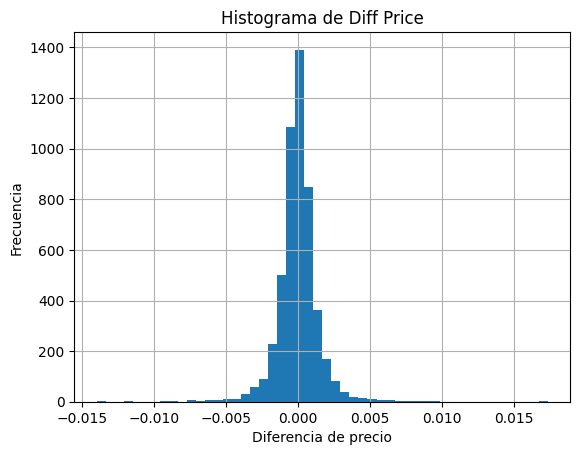

In [24]:
df1['DiffPrice'].hist(bins=50)
plt.title('Histograma de Diff Price')
plt.xlabel('Diferencia de precio')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

In [25]:
from fitter import Fitter, get_common_distributions, get_distributions


Noto que el primer elemento es Nulo para diffprice lo cual tiene sentido debido a que no habia ningún dato antes que este

In [26]:
df1=df1[df1['DiffPrice'].notna()]
df1

Close  DiffPrice
Time                                   
2022-07-25 14:00:00  1.02299   -0.00046
2022-07-25 15:00:00  1.02457    0.00158
2022-07-25 16:00:00  1.02485    0.00028
2022-07-25 17:00:00  1.02181   -0.00304
2022-07-25 18:00:00  1.02099   -0.00082
...                      ...        ...
2023-05-12 19:00:00  1.08514   -0.00038
2023-05-12 20:00:00  1.08546    0.00032
2023-05-12 21:00:00  1.08531   -0.00015
2023-05-12 22:00:00  1.08518   -0.00013
2023-05-12 23:00:00  1.08494   -0.00024

[4999 rows x 2 columns]

Según lo visto en clase el metodo fitter se usa de la siguiente forma.

Text(0, 0.5, 'Frecuencia')

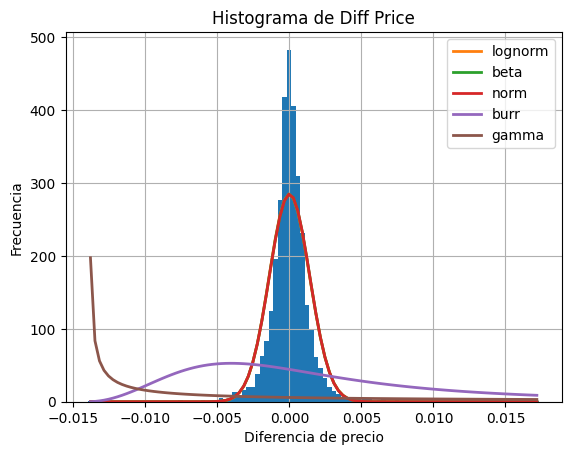

In [27]:
f = Fitter(df1['DiffPrice'],
           distributions=['gamma',
                          'lognorm',
                          "beta",
                          "burr",
                          "norm"])

f.fit()
f.summary()
f.get_best(method = 'sumsquare_error')
plt.title('Histograma de Diff Price')
plt.xlabel('Diferencia de precio')
plt.ylabel('Frecuencia')
#f.fitted_param["beta"]

Sin embargo hay una forma mas general de encontrar una distribucion que se acople a nuestro histograma, y se usa get_common_distributions()

Text(0, 0.5, 'Frecuencia')

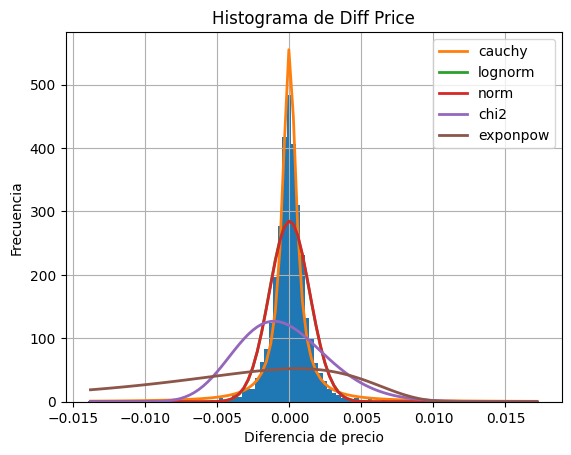

In [28]:
f = Fitter(df1['DiffPrice'],
           distributions=get_common_distributions())

f.fit()
f.summary()
f.get_best(method = 'sumsquare_error')
plt.title('Histograma de Diff Price')
plt.xlabel('Diferencia de precio')
plt.ylabel('Frecuencia')
#f.fitted_param["beta"]

Así la que mas se asemeja a el histograma (usando el criterio del error cuadratico medio) es la distribución de Cauchy

## Pregunta 7

7.Para el data frame, seleccionemos solo los datos del 2023.


Para hacer uso de loc, lo mejor es cambiar el indice de dataframe, aunque ya estaba en Time, no es suficiente pues debo de poner explicitamente que es de formato datatime.


A su vez, definiré un nuevo dataframe con solo los datos del 2023

In [29]:
df1.index=pd.to_datetime(df1.index)
df1

Close  DiffPrice
Time                                   
2022-07-25 14:00:00  1.02299   -0.00046
2022-07-25 15:00:00  1.02457    0.00158
2022-07-25 16:00:00  1.02485    0.00028
2022-07-25 17:00:00  1.02181   -0.00304
2022-07-25 18:00:00  1.02099   -0.00082
...                      ...        ...
2023-05-12 19:00:00  1.08514   -0.00038
2023-05-12 20:00:00  1.08546    0.00032
2023-05-12 21:00:00  1.08531   -0.00015
2023-05-12 22:00:00  1.08518   -0.00013
2023-05-12 23:00:00  1.08494   -0.00024

[4999 rows x 2 columns]

In [30]:
df2=df1.loc['2023']
df2

Close  DiffPrice
Time                                   
2023-01-02 00:00:00  1.06796   -0.00200
2023-01-02 01:00:00  1.06965    0.00169
2023-01-02 02:00:00  1.07058    0.00093
2023-01-02 03:00:00  1.06896   -0.00162
2023-01-02 04:00:00  1.06880   -0.00016
...                      ...        ...
2023-05-12 19:00:00  1.08514   -0.00038
2023-05-12 20:00:00  1.08546    0.00032
2023-05-12 21:00:00  1.08531   -0.00015
2023-05-12 22:00:00  1.08518   -0.00013
2023-05-12 23:00:00  1.08494   -0.00024

[2278 rows x 2 columns]

## Pregunta 8

8.El comando groupby permite agrupar los datos con la periodicidad deseada: 1 dias, 2 dias, 1 mes etc. Determina el promedio con una periodicidad de 15 dias, con periodidicidad de 1 semana, y una periodicidad de 1 mes


Buscando en la documentación solo hay que cambiar el valor de freq, además hay que tener en cuenta que como mi dataframe df2 tiene como indice el Time y ya está en el formato adecuado el pd.Grouper solo necesita la freq y no la columna(key) especifica

In [31]:
# Datos agrupados entre cada 15 dias y su media

df2.groupby(pd.Grouper(freq='15D')).mean()

Close  DiffPrice
Time                           
2023-01-02  1.069361   0.000047
2023-01-17  1.085565   0.000015
2023-02-01  1.077679  -0.000066
2023-02-16  1.063150  -0.000034
2023-03-03  1.063186   0.000026
2023-03-18  1.080936   0.000074
2023-04-02  1.093090   0.000063
2023-04-17  1.099084  -0.000006
2023-05-02  1.098889  -0.000059

In [32]:
#Datos agrupados Por semana y su media
df2.groupby(pd.Grouper(freq='W')).mean()

Close  DiffPrice
Time                           
2023-01-08  1.059972  -0.000047
2023-01-15  1.076002   0.000156
2023-01-22  1.082041   0.000020
2023-01-29  1.088414   0.000010
2023-02-05  1.089281  -0.000062
2023-02-12  1.073363  -0.000097
2023-02-19  1.069648   0.000014
2023-02-26  1.063374  -0.000124
2023-03-05  1.060854   0.000073
2023-03-12  1.060234   0.000004
2023-03-19  1.066518   0.000022
2023-03-26  1.077974   0.000079
2023-04-02  1.083874   0.000070
2023-04-09  1.090534   0.000047
2023-04-16  1.095646   0.000080
2023-04-23  1.096117  -0.000004
2023-04-30  1.101908   0.000023
2023-05-07  1.101674   0.000002
2023-05-14  1.096285  -0.000140

In [33]:
#Datos agrupados por mes(de hecho al final de cada mes) y calculado su media

df2.groupby(pd.Grouper(freq='ME')).mean()

Close  DiffPrice
Time                           
2023-01-31  1.077463   0.000031
2023-02-28  1.071167  -0.000060
2023-03-31  1.070874   0.000049
2023-04-30  1.096051   0.000036
2023-05-31  1.098980  -0.000069

## Pregunta 9

9.Para los datos asociados a los meses de 2023, construya un histograma para cada mes. Para ello puedo emplear el metodo groupby. Notetese que si no realiza una operación después de aplicar el metodo grouby, podrias iterar sobre dicho objeto, por ejemplo:


```python
q=df.groupby(pd.Grouper(key='time', freq='15D'))

for name, group in q:
  print(name, group)
```


<ipython-input-34-40a38f9046d7>:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  q=df2.groupby(pd.Grouper(freq='M'))


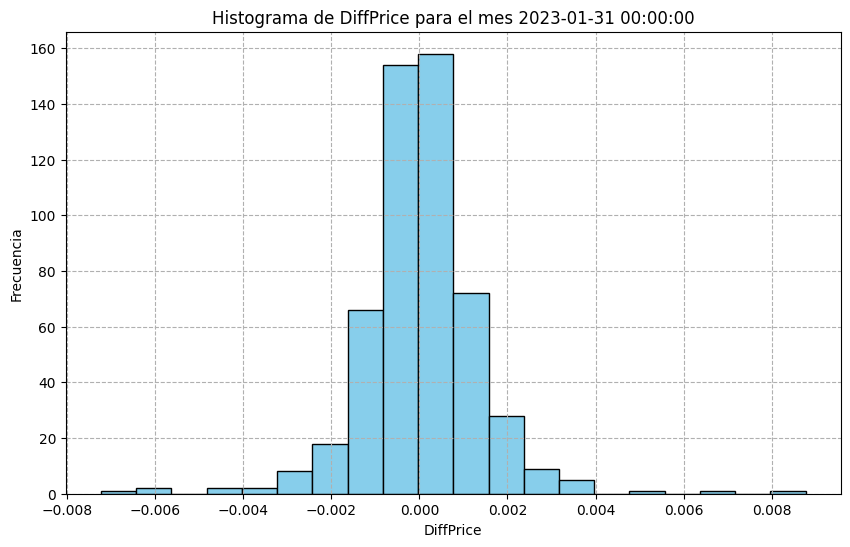

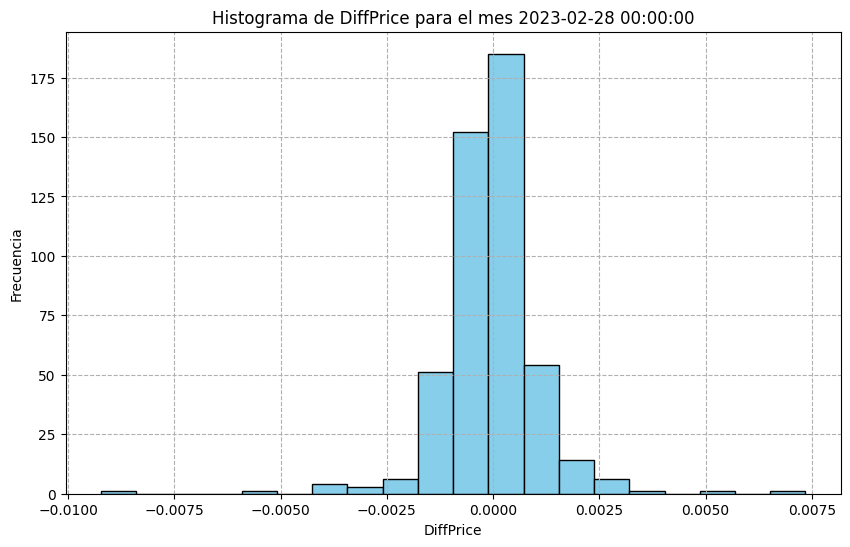

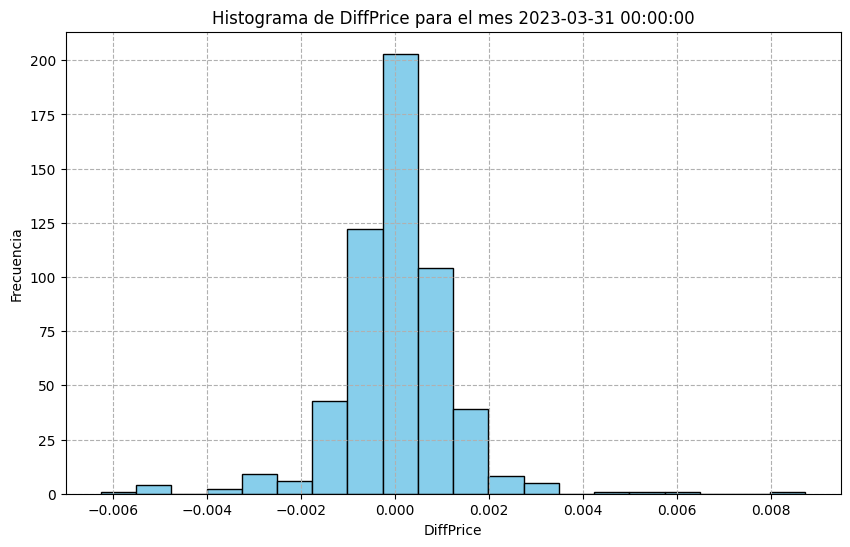

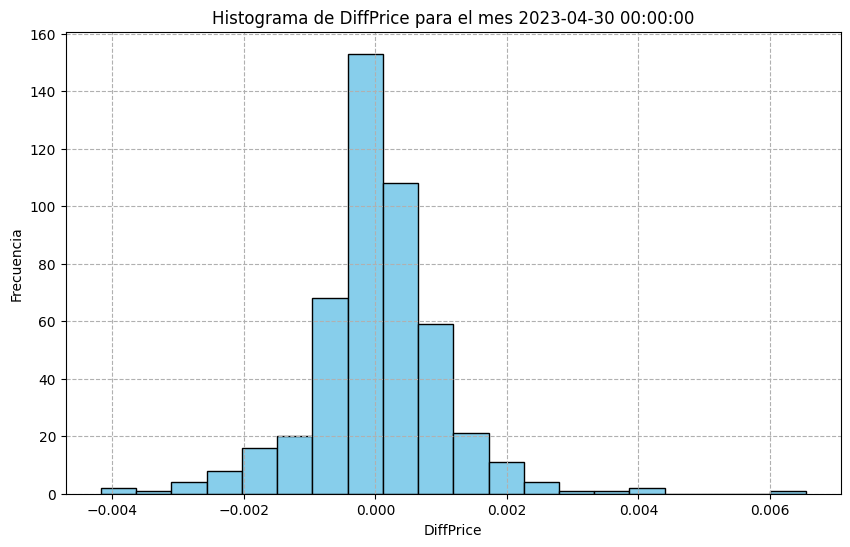

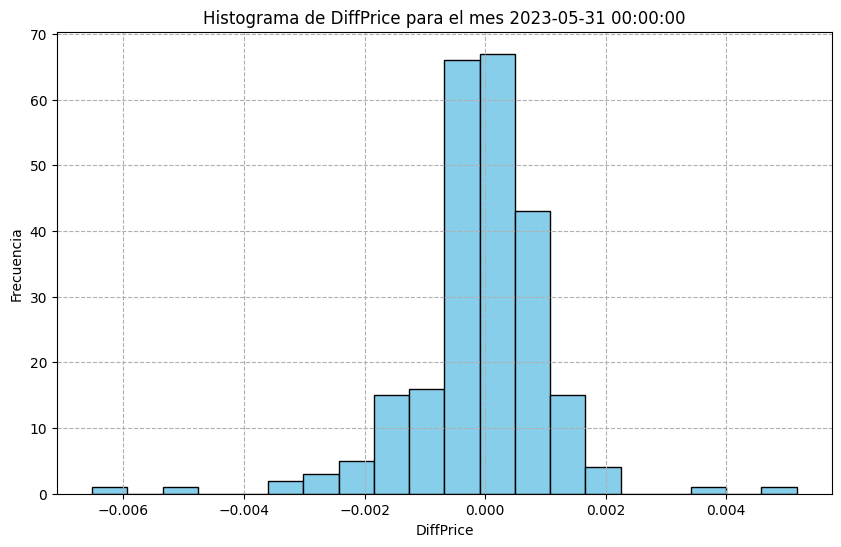

In [34]:
q=df2.groupby(pd.Grouper(freq='M'))

for name, datos in q:
  plt.figure(figsize=(10, 6))
  plt.hist(datos['DiffPrice'],bins=20,color='skyblue',edgecolor='black')
  plt.title(f'Histograma de DiffPrice para el mes {name}')
  plt.xlabel('DiffPrice')
  plt.ylabel('Frecuencia')
  plt.grid(True,linestyle='--')
  plt.show()

El titulo solo muestra el nombre que regresa el groupby

---------------
# Parte 2

# Análisis de datos con pandas.

Para el siguiente [dataset](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29) realizar lo siguiente:

## Pregunta 1

1. Leer los datos desde una página web.

In [35]:
!pip install ucimlrepo


Literalmente dentro de la pagina habia una parte que decia como realizar una extraccion de los datos, así que solo copié y pegué

In [36]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17)

# data (as pandas dataframes)
X = breast_cancer_wisconsin_diagnostic.data.features
y = breast_cancer_wisconsin_diagnostic.data.targets

# metadata
print(breast_cancer_wisconsin_diagnostic.metadata)

# variable information
print(breast_cancer_wisconsin_diagnostic.variables)


{'uci_id': 17, 'name': 'Breast Cancer Wisconsin (Diagnostic)', 'repository_url': 'https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic', 'data_url': 'https://archive.ics.uci.edu/static/public/17/data.csv', 'abstract': 'Diagnostic Wisconsin Breast Cancer Database.', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 569, 'num_features': 30, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['Diagnosis'], 'index_col': ['ID'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1993, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C5DW2B', 'creators': ['William Wolberg', 'Olvi Mangasarian', 'Nick Street', 'W. Street'], 'intro_paper': {'ID': 230, 'type': 'NATIVE', 'title': 'Nuclear feature extraction for breast tumor diagnosis', 'authors': 'W. Street, W. Wolberg, O. Mangasarian', 'venue': 'Electronic imaging', 'year': 1993, 'journal': None, 'DOI': '1

In [37]:
df=X
df

radius1  texture1  perimeter1   area1  smoothness1  compactness1  \
0      17.99     10.38      122.80  1001.0      0.11840       0.27760   
1      20.57     17.77      132.90  1326.0      0.08474       0.07864   
2      19.69     21.25      130.00  1203.0      0.10960       0.15990   
3      11.42     20.38       77.58   386.1      0.14250       0.28390   
4      20.29     14.34      135.10  1297.0      0.10030       0.13280   
..       ...       ...         ...     ...          ...           ...   
564    21.56     22.39      142.00  1479.0      0.11100       0.11590   
565    20.13     28.25      131.20  1261.0      0.09780       0.10340   
566    16.60     28.08      108.30   858.1      0.08455       0.10230   
567    20.60     29.33      140.10  1265.0      0.11780       0.27700   
568     7.76     24.54       47.92   181.0      0.05263       0.04362   

     concavity1  concave_points1  symmetry1  fractal_dimension1  ...  radius3  \
0       0.30010          0.14710     0.2419             0.07871  ...   25.380   
1       0.08690          0.07017     0.1812             0.05667  ...   24.990   
2       0.19740          0.12790     0.2069             0.05999  ...   23.570   
3       0.24140          0.10520     0.2597             0.09744  ...   14.910   
4       0.19800          0.10430     0.1809             0.05883  ...   22.540   
..          ...              ...        ...                 ...  ...      ...   
564     0.24390          0.13890     0.1726             0.05623  ...   25.450   
565     0.14400          0.09791     0.1752             0.05533  ...   23.690   
566     0.09251          0.05302     0.1590             0.05648  ...   18.980   
567     0.35140          0.15200     0.2397             0.07016  ...   25.740   
568     0.00000          0.00000     0.1587             0.05884  ...    9.456   

     texture3  perimeter3   area3  smoothness3  compactness3  concavity3  \
0       17.33      184.60  2019.0      0.16220       0.66560      0.7119   
1       23.41      158.80  1956.0      0.12380       0.18660      0.2416   
2       25.53      152.50  1709.0      0.14440       0.42450      0.4504   
3       26.50       98.87   567.7      0.20980       0.86630      0.6869   
4       16.67      152.20  1575.0      0.13740       0.20500      0.4000   
..        ...         ...     ...          ...           ...         ...   
564     26.40      166.10  2027.0      0.14100       0.21130      0.4107   
565     38.25      155.00  1731.0      0.11660       0.19220      0.3215   
566     34.12      126.70  1124.0      0.11390       0.30940      0.3403   
567     39.42      184.60  1821.0      0.16500       0.86810      0.9387   
568     30.37       59.16   268.6      0.08996       0.06444      0.0000   

     concave_points3  symmetry3  fractal_dimension3  
0             0.2654     0.4601             0.11890  
1             0.1860     0.2750             0.08902  
2             0.2430     0.3613             0.08758  
3             0.2575     0.6638             0.17300  
4             0.1625     0.2364             0.07678  
..               ...        ...                 ...  
564           0.2216     0.2060             0.07115  
565           0.1628     0.2572             0.06637  
566           0.1418     0.2218             0.07820  
567           0.2650     0.4087             0.12400  
568           0.0000     0.2871             0.07039  

[569 rows x 30 columns]

## Pregunta 2

2.Renombrar las columnas en formato PascalCase.


Basicamente utilizaré lo que usé en la parte 1 Pregunta 2

In [38]:
def pascal_case(s):
    palabra=''
    palabras=s.split('_')
    for i in palabras:
        if i[0].isupper():
            palabra+=i
        else:
            palabra+=i.capitalize()
    return palabra
columnas_pascal=[pascal_case(i) for i in df.columns]
columnas_pascal

['Radius1',
 'Texture1',
 'Perimeter1',
 'Area1',
 'Smoothness1',
 'Compactness1',
 'Concavity1',
 'ConcavePoints1',
 'Symmetry1',
 'FractalDimension1',
 'Radius2',
 'Texture2',
 'Perimeter2',
 'Area2',
 'Smoothness2',
 'Compactness2',
 'Concavity2',
 'ConcavePoints2',
 'Symmetry2',
 'FractalDimension2',
 'Radius3',
 'Texture3',
 'Perimeter3',
 'Area3',
 'Smoothness3',
 'Compactness3',
 'Concavity3',
 'ConcavePoints3',
 'Symmetry3',
 'FractalDimension3']

In [39]:
df.columns=columnas_pascal
df.columns

Index(['Radius1', 'Texture1', 'Perimeter1', 'Area1', 'Smoothness1',
       'Compactness1', 'Concavity1', 'ConcavePoints1', 'Symmetry1',
       'FractalDimension1', 'Radius2', 'Texture2', 'Perimeter2', 'Area2',
       'Smoothness2', 'Compactness2', 'Concavity2', 'ConcavePoints2',
       'Symmetry2', 'FractalDimension2', 'Radius3', 'Texture3', 'Perimeter3',
       'Area3', 'Smoothness3', 'Compactness3', 'Concavity3', 'ConcavePoints3',
       'Symmetry3', 'FractalDimension3'],
      dtype='object')

## Pregunta 3

3.Utilizar los métodos head(), tail(), describe() e info() para obtener información sobre el DataFrame.

In [40]:
df.head()

Radius1  Texture1  Perimeter1   Area1  Smoothness1  Compactness1  \
0    17.99     10.38      122.80  1001.0      0.11840       0.27760   
1    20.57     17.77      132.90  1326.0      0.08474       0.07864   
2    19.69     21.25      130.00  1203.0      0.10960       0.15990   
3    11.42     20.38       77.58   386.1      0.14250       0.28390   
4    20.29     14.34      135.10  1297.0      0.10030       0.13280   

   Concavity1  ConcavePoints1  Symmetry1  FractalDimension1  ...  Radius3  \
0      0.3001         0.14710     0.2419            0.07871  ...    25.38   
1      0.0869         0.07017     0.1812            0.05667  ...    24.99   
2      0.1974         0.12790     0.2069            0.05999  ...    23.57   
3      0.2414         0.10520     0.2597            0.09744  ...    14.91   
4      0.1980         0.10430     0.1809            0.05883  ...    22.54   

   Texture3  Perimeter3   Area3  Smoothness3  Compactness3  Concavity3  \
0     17.33      184.60  2019.0       0.1622        0.6656      0.7119   
1     23.41      158.80  1956.0       0.1238        0.1866      0.2416   
2     25.53      152.50  1709.0       0.1444        0.4245      0.4504   
3     26.50       98.87   567.7       0.2098        0.8663      0.6869   
4     16.67      152.20  1575.0       0.1374        0.2050      0.4000   

   ConcavePoints3  Symmetry3  FractalDimension3  
0          0.2654     0.4601            0.11890  
1          0.1860     0.2750            0.08902  
2          0.2430     0.3613            0.08758  
3          0.2575     0.6638            0.17300  
4          0.1625     0.2364            0.07678  

[5 rows x 30 columns]

In [41]:
df.tail()

Radius1  Texture1  Perimeter1   Area1  Smoothness1  Compactness1  \
564    21.56     22.39      142.00  1479.0      0.11100       0.11590   
565    20.13     28.25      131.20  1261.0      0.09780       0.10340   
566    16.60     28.08      108.30   858.1      0.08455       0.10230   
567    20.60     29.33      140.10  1265.0      0.11780       0.27700   
568     7.76     24.54       47.92   181.0      0.05263       0.04362   

     Concavity1  ConcavePoints1  Symmetry1  FractalDimension1  ...  Radius3  \
564     0.24390         0.13890     0.1726            0.05623  ...   25.450   
565     0.14400         0.09791     0.1752            0.05533  ...   23.690   
566     0.09251         0.05302     0.1590            0.05648  ...   18.980   
567     0.35140         0.15200     0.2397            0.07016  ...   25.740   
568     0.00000         0.00000     0.1587            0.05884  ...    9.456   

     Texture3  Perimeter3   Area3  Smoothness3  Compactness3  Concavity3  \
564     26.40      166.10  2027.0      0.14100       0.21130      0.4107   
565     38.25      155.00  1731.0      0.11660       0.19220      0.3215   
566     34.12      126.70  1124.0      0.11390       0.30940      0.3403   
567     39.42      184.60  1821.0      0.16500       0.86810      0.9387   
568     30.37       59.16   268.6      0.08996       0.06444      0.0000   

     ConcavePoints3  Symmetry3  FractalDimension3  
564          0.2216     0.2060            0.07115  
565          0.1628     0.2572            0.06637  
566          0.1418     0.2218            0.07820  
567          0.2650     0.4087            0.12400  
568          0.0000     0.2871            0.07039  

[5 rows x 30 columns]

In [42]:
df.describe()

Radius1    Texture1  Perimeter1        Area1  Smoothness1  \
count  569.000000  569.000000  569.000000   569.000000   569.000000   
mean    14.127292   19.289649   91.969033   654.889104     0.096360   
std      3.524049    4.301036   24.298981   351.914129     0.014064   
min      6.981000    9.710000   43.790000   143.500000     0.052630   
25%     11.700000   16.170000   75.170000   420.300000     0.086370   
50%     13.370000   18.840000   86.240000   551.100000     0.095870   
75%     15.780000   21.800000  104.100000   782.700000     0.105300   
max     28.110000   39.280000  188.500000  2501.000000     0.163400   

       Compactness1  Concavity1  ConcavePoints1   Symmetry1  \
count    569.000000  569.000000      569.000000  569.000000   
mean       0.104341    0.088799        0.048919    0.181162   
std        0.052813    0.079720        0.038803    0.027414   
min        0.019380    0.000000        0.000000    0.106000   
25%        0.064920    0.029560        0.020310    0.161900   
50%        0.092630    0.061540        0.033500    0.179200   
75%        0.130400    0.130700        0.074000    0.195700   
max        0.345400    0.426800        0.201200    0.304000   

       FractalDimension1  ...     Radius3    Texture3  Perimeter3  \
count         569.000000  ...  569.000000  569.000000  569.000000   
mean            0.062798  ...   16.269190   25.677223  107.261213   
std             0.007060  ...    4.833242    6.146258   33.602542   
min             0.049960  ...    7.930000   12.020000   50.410000   
25%             0.057700  ...   13.010000   21.080000   84.110000   
50%             0.061540  ...   14.970000   25.410000   97.660000   
75%             0.066120  ...   18.790000   29.720000  125.400000   
max             0.097440  ...   36.040000   49.540000  251.200000   

             Area3  Smoothness3  Compactness3  Concavity3  ConcavePoints3  \
count   569.000000   569.000000    569.000000  569.000000      569.000000   
mean    880.583128     0.132369      0.254265    0.272188        0.114606   
std     569.356993     0.022832      0.157336    0.208624        0.065732   
min     185.200000     0.071170      0.027290    0.000000        0.000000   
25%     515.300000     0.116600      0.147200    0.114500        0.064930   
50%     686.500000     0.131300      0.211900    0.226700        0.099930   
75%    1084.000000     0.146000      0.339100    0.382900        0.161400   
max    4254.000000     0.222600      1.058000    1.252000        0.291000   

        Symmetry3  FractalDimension3  
count  569.000000         569.000000  
mean     0.290076           0.083946  
std      0.061867           0.018061  
min      0.156500           0.055040  
25%      0.250400           0.071460  
50%      0.282200           0.080040  
75%      0.317900           0.092080  
max      0.663800           0.207500  

[8 rows x 30 columns]

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Radius1            569 non-null    float64
 1   Texture1           569 non-null    float64
 2   Perimeter1         569 non-null    float64
 3   Area1              569 non-null    float64
 4   Smoothness1        569 non-null    float64
 5   Compactness1       569 non-null    float64
 6   Concavity1         569 non-null    float64
 7   ConcavePoints1     569 non-null    float64
 8   Symmetry1          569 non-null    float64
 9   FractalDimension1  569 non-null    float64
 10  Radius2            569 non-null    float64
 11  Texture2           569 non-null    float64
 12  Perimeter2         569 non-null    float64
 13  Area2              569 non-null    float64
 14  Smoothness2        569 non-null    float64
 15  Compactness2       569 non-null    float64
 16  Concavity2         569 non

Primero hay que entender que según el link, y la descripcion de los datos que dan en el mismo es un dataframe que contiene un muestreo de los senos de un cierto numero de mujeres. Además investigando según google, el metodo empleado para la investigación es el de FNA, este consiste en extraer una muestra del tejido del seno mediante una aguja.

Del df.head() se intuye que las columnas son nombres de las propiedades que tienen los senos de los cuales las muestras fueron sacadas. Tales como el radio, la textura, el perimetro, area, suavidad, compactifidad, concavidad, etc... muestran los 5 primeros conjuntos de datos(es decir filas), obvio podria sacar mas si le introdujece al head un entero mayor a 5

El df.tail() me muestra las ultimas 5 filos, dandome así a entender los hay 568 filas, es decir 568 mujeres fueron evaluadas en esta investigacion. Adicional a esto se obseva(algo que se me habia pasado en head) que hay 30 columnas, es decir hay 30 propiedades extraidas de cada muestreo.

Del df.describe() observo que me habia equivocado en concluir que habian 568 filas, en realidad hay 569. Además del conteo, se puede extraer la media de de todas las columnas descritas en df.head, la desviacion estandar, minimo, maximo y la separación por cuartiles(25%, 50%,75%, auqnue en realidad son 3 y no 4, así que no sé si sea mas apropiado llamarlo percentiles)

Por ultimo del df.info() se observa que las columnas están mostradas de una forma mas ordenda y me da información acerca de las mismas, brinda el conteo de valores nulos en cada columna y el tipo de dato alojado en las mismas. Noto que no hay ningún dato faltante, además de que todos los datos alojados en las colummnas son de float64, es decir reales.

## Pregunta 4

4. Contabilizar la cantidad de valores nulos (null o NaN) en el DataFrame. Si se encuentran valores nulos, ¿qué estrategia propondrías para reemplazarlos?

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Radius1            569 non-null    float64
 1   Texture1           569 non-null    float64
 2   Perimeter1         569 non-null    float64
 3   Area1              569 non-null    float64
 4   Smoothness1        569 non-null    float64
 5   Compactness1       569 non-null    float64
 6   Concavity1         569 non-null    float64
 7   ConcavePoints1     569 non-null    float64
 8   Symmetry1          569 non-null    float64
 9   FractalDimension1  569 non-null    float64
 10  Radius2            569 non-null    float64
 11  Texture2           569 non-null    float64
 12  Perimeter2         569 non-null    float64
 13  Area2              569 non-null    float64
 14  Smoothness2        569 non-null    float64
 15  Compactness2       569 non-null    float64
 16  Concavity2         569 non

Con el df.info se observa que no hay ningun dato en las columnas(y por ende en el dataframe) nulo, permitiendo así una visaulizacion rapida si hay necesidad o no de realizar una limpieza, en el caso de que tuviera que tuviera que realizar una limpieza usaria, lo que dije en el punto 4 de la parte 1


```python
for i in df.columns:
    df=df[df[i].notna()]
```



## Pregunta 5

5. Identificar los valores únicos en la columna target que representan las etiquetas B y M (Benigno y Maligno, respectivamente). Utiliza el método unique() para mostrar estos valores.



In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Radius1            569 non-null    float64
 1   Texture1           569 non-null    float64
 2   Perimeter1         569 non-null    float64
 3   Area1              569 non-null    float64
 4   Smoothness1        569 non-null    float64
 5   Compactness1       569 non-null    float64
 6   Concavity1         569 non-null    float64
 7   ConcavePoints1     569 non-null    float64
 8   Symmetry1          569 non-null    float64
 9   FractalDimension1  569 non-null    float64
 10  Radius2            569 non-null    float64
 11  Texture2           569 non-null    float64
 12  Perimeter2         569 non-null    float64
 13  Area2              569 non-null    float64
 14  Smoothness2        569 non-null    float64
 15  Compactness2       569 non-null    float64
 16  Concavity2         569 non

No encontré en el dataframe extraido df un apartado(columna) llamado target. Sin embargo al analizar la extracción de datos me doy cuenta que "y" guarda también una parte de la base de datos original. Y pues esta es aparentemente la que pide el punto 5

In [46]:
y

Diagnosis
0           M
1           M
2           M
3           M
4           M
..        ...
564         M
565         M
566         M
567         M
568         B

[569 rows x 1 columns]

In [47]:
y['Diagnosis'].unique()

array(['M', 'B'], dtype=object)

Noto que efectivamente hay solo 2 posibilidades acerca del tejido extraido, o es maligno o beningo según lo expuesto en el estudio mediante el dataframe

## Pregunta 6

Realizar un conteo de los casos etiquetados como B y M utilizando la librería seaborn y el método countplot():

```python

import seaborn as sns

sns.countplot?
```

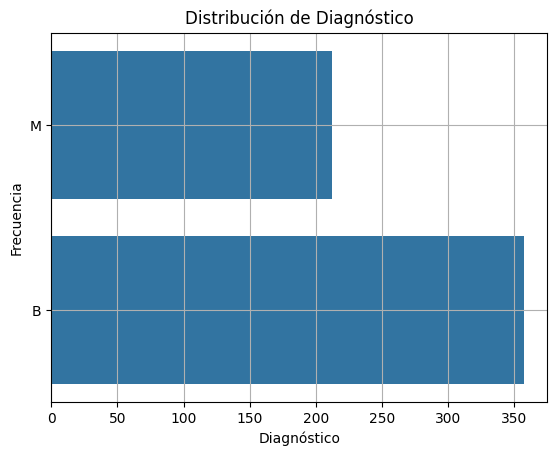

In [48]:
sns.countplot(y=y['Diagnosis'])
plt.title('Distribución de Diagnóstico')
plt.xlabel('Diagnóstico')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

In [49]:
y['Diagnosis'].value_counts()

Diagnosis
B    357
M    212
Name: count, dtype: int64

## Pregunta 7

Agregar una nueva columna llamada DiagnosisNumeric donde se asigna el valor 0 a la etiqueta B (Benigno) y el valor 1 a la etiqueta M (Maligno).



In [50]:
y['Diagnosis']

0      M
1      M
2      M
3      M
4      M
      ..
564    M
565    M
566    M
567    M
568    B
Name: Diagnosis, Length: 569, dtype: object

In [51]:
y['Diagnosis'].map({'B':0,'M':1})

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: Diagnosis, Length: 569, dtype: int64

In [52]:
df['DiagnosisNumeric']=y['Diagnosis'].map({'B':0,'M':1})

<ipython-input-52-ac20a472c942>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['DiagnosisNumeric']=y['Diagnosis'].map({'B':0,'M':1})


In [53]:
df['DiagnosisNumeric']

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: DiagnosisNumeric, Length: 569, dtype: int64

## Pregunta 8

8.Normalizar cada columna respecto a su media y desviación estándar utilizando la fórmula:
(x - mean(x)) / std(x)

In [54]:
df

Radius1  Texture1  Perimeter1   Area1  Smoothness1  Compactness1  \
0      17.99     10.38      122.80  1001.0      0.11840       0.27760   
1      20.57     17.77      132.90  1326.0      0.08474       0.07864   
2      19.69     21.25      130.00  1203.0      0.10960       0.15990   
3      11.42     20.38       77.58   386.1      0.14250       0.28390   
4      20.29     14.34      135.10  1297.0      0.10030       0.13280   
..       ...       ...         ...     ...          ...           ...   
564    21.56     22.39      142.00  1479.0      0.11100       0.11590   
565    20.13     28.25      131.20  1261.0      0.09780       0.10340   
566    16.60     28.08      108.30   858.1      0.08455       0.10230   
567    20.60     29.33      140.10  1265.0      0.11780       0.27700   
568     7.76     24.54       47.92   181.0      0.05263       0.04362   

     Concavity1  ConcavePoints1  Symmetry1  FractalDimension1  ...  Texture3  \
0       0.30010         0.14710     0.2419            0.07871  ...     17.33   
1       0.08690         0.07017     0.1812            0.05667  ...     23.41   
2       0.19740         0.12790     0.2069            0.05999  ...     25.53   
3       0.24140         0.10520     0.2597            0.09744  ...     26.50   
4       0.19800         0.10430     0.1809            0.05883  ...     16.67   
..          ...             ...        ...                ...  ...       ...   
564     0.24390         0.13890     0.1726            0.05623  ...     26.40   
565     0.14400         0.09791     0.1752            0.05533  ...     38.25   
566     0.09251         0.05302     0.1590            0.05648  ...     34.12   
567     0.35140         0.15200     0.2397            0.07016  ...     39.42   
568     0.00000         0.00000     0.1587            0.05884  ...     30.37   

     Perimeter3   Area3  Smoothness3  Compactness3  Concavity3  \
0        184.60  2019.0      0.16220       0.66560      0.7119   
1        158.80  1956.0      0.12380       0.18660      0.2416   
2        152.50  1709.0      0.14440       0.42450      0.4504   
3         98.87   567.7      0.20980       0.86630      0.6869   
4        152.20  1575.0      0.13740       0.20500      0.4000   
..          ...     ...          ...           ...         ...   
564      166.10  2027.0      0.14100       0.21130      0.4107   
565      155.00  1731.0      0.11660       0.19220      0.3215   
566      126.70  1124.0      0.11390       0.30940      0.3403   
567      184.60  1821.0      0.16500       0.86810      0.9387   
568       59.16   268.6      0.08996       0.06444      0.0000   

     ConcavePoints3  Symmetry3  FractalDimension3  DiagnosisNumeric  
0            0.2654     0.4601            0.11890                 1  
1            0.1860     0.2750            0.08902                 1  
2            0.2430     0.3613            0.08758                 1  
3            0.2575     0.6638            0.17300                 1  
4            0.1625     0.2364            0.07678                 1  
..              ...        ...                ...               ...  
564          0.2216     0.2060            0.07115                 1  
565          0.1628     0.2572            0.06637                 1  
566          0.1418     0.2218            0.07820                 1  
567          0.2650     0.4087            0.12400                 1  
568          0.0000     0.2871            0.07039                 0  

[569 rows x 31 columns]

In [55]:
def normalizar(x):
  return (x-np.mean(x))/np.std(x)

for i in df.columns:
  df[i]=normalizar(df[i])

<ipython-input-55-ad8d01570afe>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i]=normalizar(df[i])


In [56]:
df

Radius1  Texture1  Perimeter1     Area1  Smoothness1  Compactness1  \
0    1.097064 -2.073335    1.269934  0.984375     1.568466      3.283515   
1    1.829821 -0.353632    1.685955  1.908708    -0.826962     -0.487072   
2    1.579888  0.456187    1.566503  1.558884     0.942210      1.052926   
3   -0.768909  0.253732   -0.592687 -0.764464     3.283553      3.402909   
4    1.750297 -1.151816    1.776573  1.826229     0.280372      0.539340   
..        ...       ...         ...       ...          ...           ...   
564  2.110995  0.721473    2.060786  2.343856     1.041842      0.219060   
565  1.704854  2.085134    1.615931  1.723842     0.102458     -0.017833   
566  0.702284  2.045574    0.672676  0.577953    -0.840484     -0.038680   
567  1.838341  2.336457    1.982524  1.735218     1.525767      3.272144   
568 -1.808401  1.221792   -1.814389 -1.347789    -3.112085     -1.150752   

     Concavity1  ConcavePoints1  Symmetry1  FractalDimension1  ...  Texture3  \
0      2.652874        2.532475   2.217515           2.255747  ... -1.359293   
1     -0.023846        0.548144   0.001392          -0.868652  ... -0.369203   
2      1.363478        2.037231   0.939685          -0.398008  ... -0.023974   
3      1.915897        1.451707   2.867383           4.910919  ...  0.133984   
4      1.371011        1.428493  -0.009560          -0.562450  ... -1.466770   
..          ...             ...        ...                ...  ...       ...   
564    1.947285        2.320965  -0.312589          -0.931027  ...  0.117700   
565    0.693043        1.263669  -0.217664          -1.058611  ...  2.047399   
566    0.046588        0.105777  -0.809117          -0.895587  ...  1.374854   
567    3.296944        2.658866   2.137194           1.043695  ...  2.237926   
568   -1.114873       -1.261820  -0.820070          -0.561032  ...  0.764190   

     Perimeter3     Area3  Smoothness3  Compactness3  Concavity3  \
0      2.303601  2.001237     1.307686      2.616665    2.109526   
1      1.535126  1.890489    -0.375612     -0.430444   -0.146749   
2      1.347475  1.456285     0.527407      1.082932    0.854974   
3     -0.249939 -0.550021     3.394275      3.893397    1.989588   
4      1.338539  1.220724     0.220556     -0.313395    0.613179   
..          ...       ...          ...           ...         ...   
564    1.752563  2.015301     0.378365     -0.273318    0.664512   
565    1.421940  1.494959    -0.691230     -0.394820    0.236573   
566    0.579001  0.427906    -0.809587      0.350735    0.326767   
567    2.303601  1.653171     1.430427      3.904848    3.197605   
568   -1.432735 -1.075813    -1.859019     -1.207552   -1.305831   

     ConcavePoints3  Symmetry3  FractalDimension3  DiagnosisNumeric  
0          2.296076   2.750622           1.937015          1.297676  
1          1.087084  -0.243890           0.281190          1.297676  
2          1.955000   1.152255           0.201391          1.297676  
3          2.175786   6.046041           4.935010          1.297676  
4          0.729259  -0.868353          -0.397100          1.297676  
..              ...        ...                ...               ...  
564        1.629151  -1.360158          -0.709091          1.297676  
565        0.733827  -0.531855          -0.973978          1.297676  
566        0.414069  -1.104549          -0.318409          1.297676  
567        2.289985   1.919083           2.219635          1.297676  
568       -1.745063  -0.048138          -0.751207         -0.770609  

[569 rows x 31 columns]

## Pregunta 9

9.Agrupar características similares y calcular su promedio. Para las siguientes características:


```python
['RadiusMean', 'TextureMean', 'PerimeterMean', 'AreaMean', 'SmoothnessMean', 'CompactnessMean', 'ConcavityMean', 'ConcavePointsMean', "SymmetryMean", "FractalDimensionMean"]
```
Usa expresiones regulares para identificar patrones comunes, como radius1, radius2,radius3, etc., y calcular los promedios. Por ejemplo:


```
re.match(r'^[a-zA-Z_]+', "holamundo12341").group(0)
```


También puedes utilizar el método `startswith()` para buscar estos patrones en los nombres de las columnas.



Veamos que los posibles patrones que hay, es decir usando set, estos son  los siguientes





In [57]:
import re

prefijos=set(re.match(r'^[a-zA-Z_]+', i).group(0) for i in df.columns)
prefijos


{'Area',
 'Compactness',
 'ConcavePoints',
 'Concavity',
 'DiagnosisNumeric',
 'FractalDimension',
 'Perimeter',
 'Radius',
 'Smoothness',
 'Symmetry',
 'Texture'}

Noto que la lista

```python
['RadiusMean', 'TextureMean', 'PerimeterMean', 'AreaMean', 'SmoothnessMean', 'CompactnessMean', 'ConcavityMean', 'ConcavePointsMean', "SymmetryMean", "FractalDimensionMean"]
```

Coincide con la que yo encontré a excepción de DiagnosisNumeric,así que esa la quitaré de lo que encontré

In [58]:
prefijos.remove('DiagnosisNumeric')
for i in prefijos:
  print(i)

Perimeter
Texture
Concavity
Symmetry
Smoothness
Area
ConcavePoints
FractalDimension
Compactness
Radius


In [59]:
for i in prefijos:
  columnas=[col for col in df.columns if col.startswith(i)]
  print(columnas)

['Perimeter1', 'Perimeter2', 'Perimeter3']
['Texture1', 'Texture2', 'Texture3']
['Concavity1', 'Concavity2', 'Concavity3']
['Symmetry1', 'Symmetry2', 'Symmetry3']
['Smoothness1', 'Smoothness2', 'Smoothness3']
['Area1', 'Area2', 'Area3']
['ConcavePoints1', 'ConcavePoints2', 'ConcavePoints3']
['FractalDimension1', 'FractalDimension2', 'FractalDimension3']
['Compactness1', 'Compactness2', 'Compactness3']
['Radius1', 'Radius2', 'Radius3']


Así hay una segregación de todas las columnas, por tanto solo resta sacarles el Mean entre columnas, y agregarla en una nueva columan que se tenga el sufijo Mean


In [60]:
for i in prefijos:
  columnas=[col for col in df.columns if col.startswith(i)]
  df[f'{i}Mean']=df[columnas].mean(axis=1)


In [61]:
df

Radius1  Texture1  Perimeter1     Area1  Smoothness1  Compactness1  \
0    1.097064 -2.073335    1.269934  0.984375     1.568466      3.283515   
1    1.829821 -0.353632    1.685955  1.908708    -0.826962     -0.487072   
2    1.579888  0.456187    1.566503  1.558884     0.942210      1.052926   
3   -0.768909  0.253732   -0.592687 -0.764464     3.283553      3.402909   
4    1.750297 -1.151816    1.776573  1.826229     0.280372      0.539340   
..        ...       ...         ...       ...          ...           ...   
564  2.110995  0.721473    2.060786  2.343856     1.041842      0.219060   
565  1.704854  2.085134    1.615931  1.723842     0.102458     -0.017833   
566  0.702284  2.045574    0.672676  0.577953    -0.840484     -0.038680   
567  1.838341  2.336457    1.982524  1.735218     1.525767      3.272144   
568 -1.808401  1.221792   -1.814389 -1.347789    -3.112085     -1.150752   

     Concavity1  ConcavePoints1  Symmetry1  FractalDimension1  ...  \
0      2.652874        2.532475   2.217515           2.255747  ...   
1     -0.023846        0.548144   0.001392          -0.868652  ...   
2      1.363478        2.037231   0.939685          -0.398008  ...   
3      1.915897        1.451707   2.867383           4.910919  ...   
4      1.371011        1.428493  -0.009560          -0.562450  ...   
..          ...             ...        ...                ...  ...   
564    1.947285        2.320965  -0.312589          -0.931027  ...   
565    0.693043        1.263669  -0.217664          -1.058611  ...   
566    0.046588        0.105777  -0.809117          -0.895587  ...   
567    3.296944        2.658866   2.137194           1.043695  ...   
568   -1.114873       -1.261820  -0.820070          -0.561032  ...   

     PerimeterMean  TextureMean  ConcavityMean  SymmetryMean  SmoothnessMean  \
0         2.135522    -1.332631       1.828809      2.038965        0.887384   
1         1.161469    -0.533026      -0.203792     -0.349316       -0.602642   
2         1.254969    -0.115957       0.810510      0.776325        0.390871   
3        -0.185344     0.092436       1.575001      4.548702        2.455843   
4         1.462767    -1.136277       0.937554     -0.413002        0.661332   
..             ...          ...            ...           ...             ...   
564       2.064310     0.303399       1.092599     -0.937054        0.835531   
565       1.398243     2.131157       0.393939     -0.312893       -0.337594   
566       0.509456     1.054352       0.294727     -0.935027       -0.676471   
567       1.908218     1.753490       2.598944      1.460970        0.927731   
568      -1.134858     0.789691      -1.159401     -0.038459       -1.640587   

     AreaMean  ConcavePointsMean  FractalDimensionMean  CompactnessMean  \
0    1.824397           1.829790              1.699948         2.405680   
1    1.513866           0.631797             -0.228969        -0.536814   
2    1.398835           1.805686              0.032314         0.983610   
3   -0.534288           1.580833              3.964480         3.346862   
4    1.412437           1.100652             -0.153407         0.059142   
..        ...                ...                   ...              ...   
564  2.321114           2.005764             -0.490713         0.045849   
565  1.503455           0.935309             -0.841048        -0.160804   
566  0.395519           0.377334             -0.392423         0.324444   
567  1.465964           1.911524              1.389129         3.064903   
568 -0.963251          -1.640110             -0.564998        -1.173940   

     RadiusMean  
0      1.824496  
1      1.378334  
2      1.440145  
3     -0.241333  
4      1.439805  
..          ...  
564    2.264753  
565    1.514025  
566    0.482846  
567    1.652505  
568   -1.096524  

[569 rows x 41 columns]

In [62]:
df.columns

Index(['Radius1', 'Texture1', 'Perimeter1', 'Area1', 'Smoothness1',
       'Compactness1', 'Concavity1', 'ConcavePoints1', 'Symmetry1',
       'FractalDimension1', 'Radius2', 'Texture2', 'Perimeter2', 'Area2',
       'Smoothness2', 'Compactness2', 'Concavity2', 'ConcavePoints2',
       'Symmetry2', 'FractalDimension2', 'Radius3', 'Texture3', 'Perimeter3',
       'Area3', 'Smoothness3', 'Compactness3', 'Concavity3', 'ConcavePoints3',
       'Symmetry3', 'FractalDimension3', 'DiagnosisNumeric', 'PerimeterMean',
       'TextureMean', 'ConcavityMean', 'SymmetryMean', 'SmoothnessMean',
       'AreaMean', 'ConcavePointsMean', 'FractalDimensionMean',
       'CompactnessMean', 'RadiusMean'],
      dtype='object')

Por tanto agregué con exito las columnas pedidas.


Nota: obviamente trabajé con el dataframe normalizado de los puntos anteriores.

## Pregunta 10


10. Crear un gráfico donde se muestre el histograma de la columna `RadiusMean` separado por las etiquetas B y M, utilizando colores diferentes (naranja y azul, respectivamente) para cada diagnóstico.

In [63]:
df[['RadiusMean','DiagnosisNumeric']]

RadiusMean  DiagnosisNumeric
0      1.824496          1.297676
1      1.378334          1.297676
2      1.440145          1.297676
3     -0.241333          1.297676
4      1.439805          1.297676
..          ...               ...
564    2.264753          1.297676
565    1.514025          1.297676
566    0.482846          1.297676
567    1.652505          1.297676
568   -1.096524         -0.770609

[569 rows x 2 columns]

Noto que el DiagnosisNumeric no me sirve, pero como en ninguna parte del laboratorio se me pide agregar los valores "y", que contienen a la categorización de si son malignos o benignos entoncés utilizaré "y"

In [64]:
df1=df.copy()

df1['Diagnosis']=y['Diagnosis']
df1

Radius1  Texture1  Perimeter1     Area1  Smoothness1  Compactness1  \
0    1.097064 -2.073335    1.269934  0.984375     1.568466      3.283515   
1    1.829821 -0.353632    1.685955  1.908708    -0.826962     -0.487072   
2    1.579888  0.456187    1.566503  1.558884     0.942210      1.052926   
3   -0.768909  0.253732   -0.592687 -0.764464     3.283553      3.402909   
4    1.750297 -1.151816    1.776573  1.826229     0.280372      0.539340   
..        ...       ...         ...       ...          ...           ...   
564  2.110995  0.721473    2.060786  2.343856     1.041842      0.219060   
565  1.704854  2.085134    1.615931  1.723842     0.102458     -0.017833   
566  0.702284  2.045574    0.672676  0.577953    -0.840484     -0.038680   
567  1.838341  2.336457    1.982524  1.735218     1.525767      3.272144   
568 -1.808401  1.221792   -1.814389 -1.347789    -3.112085     -1.150752   

     Concavity1  ConcavePoints1  Symmetry1  FractalDimension1  ...  \
0      2.652874        2.532475   2.217515           2.255747  ...   
1     -0.023846        0.548144   0.001392          -0.868652  ...   
2      1.363478        2.037231   0.939685          -0.398008  ...   
3      1.915897        1.451707   2.867383           4.910919  ...   
4      1.371011        1.428493  -0.009560          -0.562450  ...   
..          ...             ...        ...                ...  ...   
564    1.947285        2.320965  -0.312589          -0.931027  ...   
565    0.693043        1.263669  -0.217664          -1.058611  ...   
566    0.046588        0.105777  -0.809117          -0.895587  ...   
567    3.296944        2.658866   2.137194           1.043695  ...   
568   -1.114873       -1.261820  -0.820070          -0.561032  ...   

     TextureMean  ConcavityMean  SymmetryMean  SmoothnessMean  AreaMean  \
0      -1.332631       1.828809      2.038965        0.887384  1.824397   
1      -0.533026      -0.203792     -0.349316       -0.602642  1.513866   
2      -0.115957       0.810510      0.776325        0.390871  1.398835   
3       0.092436       1.575001      4.548702        2.455843 -0.534288   
4      -1.136277       0.937554     -0.413002        0.661332  1.412437   
..           ...            ...           ...             ...       ...   
564     0.303399       1.092599     -0.937054        0.835531  2.321114   
565     2.131157       0.393939     -0.312893       -0.337594  1.503455   
566     1.054352       0.294727     -0.935027       -0.676471  0.395519   
567     1.753490       2.598944      1.460970        0.927731  1.465964   
568     0.789691      -1.159401     -0.038459       -1.640587 -0.963251   

     ConcavePointsMean  FractalDimensionMean  CompactnessMean  RadiusMean  \
0             1.829790              1.699948         2.405680    1.824496   
1             0.631797             -0.228969        -0.536814    1.378334   
2             1.805686              0.032314         0.983610    1.440145   
3             1.580833              3.964480         3.346862   -0.241333   
4             1.100652             -0.153407         0.059142    1.439805   
..                 ...                   ...              ...         ...   
564           2.005764             -0.490713         0.045849    2.264753   
565           0.935309             -0.841048        -0.160804    1.514025   
566           0.377334             -0.392423         0.324444    0.482846   
567           1.911524              1.389129         3.064903    1.652505   
568          -1.640110             -0.564998        -1.173940   -1.096524   

     Diagnosis  
0            M  
1            M  
2            M  
3            M  
4            M  
..         ...  
564          M  
565          M  
566          M  
567          M  
568          B  

[569 rows x 42 columns]

Resulta que sns permite realizar el histograma segregando una columan por otra columna que nos da la caractefistica. con el parametro hue

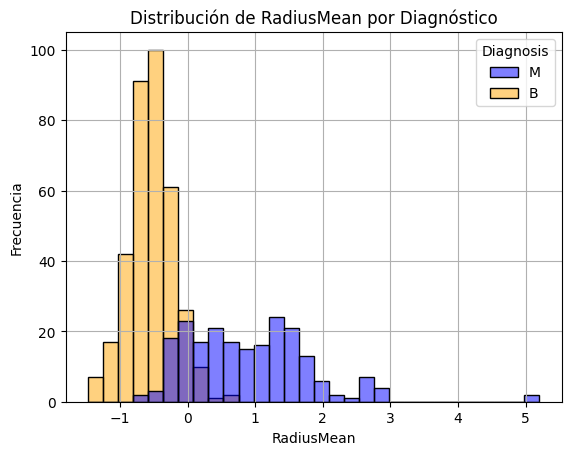

In [65]:
sns.histplot(data=df1, x='RadiusMean', hue='Diagnosis', palette={'B': 'orange', 'M': 'blue'}, bins=30)
plt.title('Distribución de RadiusMean por Diagnóstico')
plt.xlabel('RadiusMean')
plt.ylabel('Frecuencia')
plt.grid()
plt.show()

## Pregunta 11

11. Generar gráficos de violín para múltiples características.
   Para las columnas:

   - `RadiusMean`
   - `TextureMean`
   - `PerimeterMean`
   - `AreaMean`
   - `SmoothnessMean`
   - `CompactnessMean`
   - `ConcavityMean`
   - `ConcavePointsMean`
   - `Symmetry3`
   - `FractalDimension3`

   Realiza un gráfico múltiple tipo violín, como en el siguiente ejemplo:

```python
data = pd.melt(df.iloc[:, 0:10], id_vars="Diagnosis", var_name="features", value_name="value")
sns.violinplot(x="features", y="value", hue="Diagnosis", data=data, split=True, inner="quart")
plt.xticks(rotation=45)
```

<ipython-input-66-f6fbede1dd9f>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=y['Diagnosis'], y=df['RadiusMean'], palette={'B': 'orange', 'M': 'blue'})


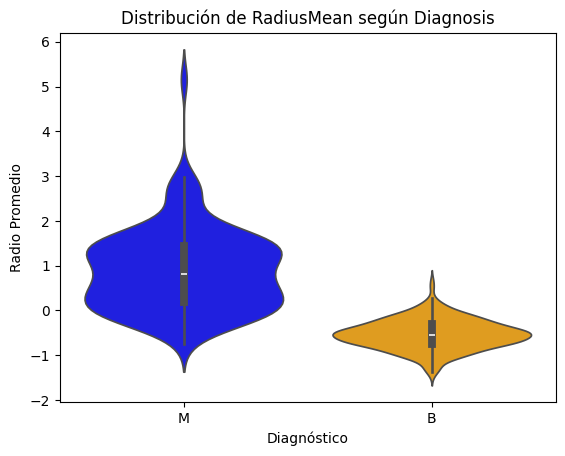

In [66]:
sns.violinplot(x=y['Diagnosis'], y=df['RadiusMean'], palette={'B': 'orange', 'M': 'blue'})
plt.xlabel("Diagnóstico")
plt.ylabel("Radio Promedio")
plt.title("Distribución de RadiusMean según Diagnosis")
plt.show()

Como son muy puntuales(en nombre) los graficos a realizar entonces los haré todo de forma larga.

<ipython-input-67-5c01161599ff>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=y['Diagnosis'], y=df[caracteristica], palette={'B': 'orange', 'M': 'blue'})


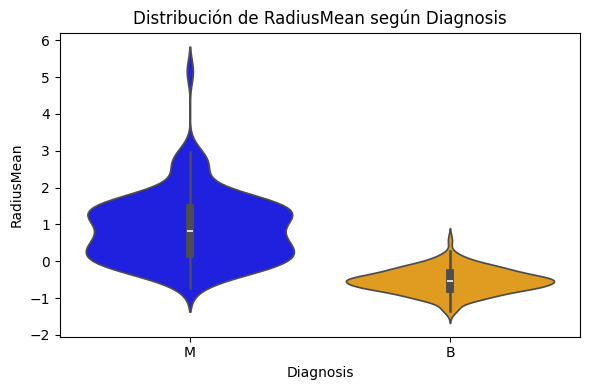

<ipython-input-67-5c01161599ff>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=y['Diagnosis'], y=df[caracteristica], palette={'B': 'orange', 'M': 'blue'})


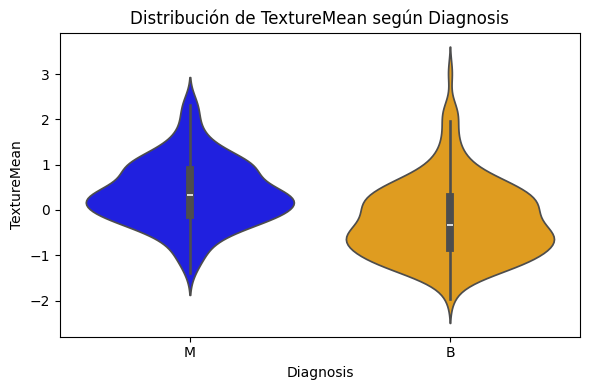

<ipython-input-67-5c01161599ff>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=y['Diagnosis'], y=df[caracteristica], palette={'B': 'orange', 'M': 'blue'})


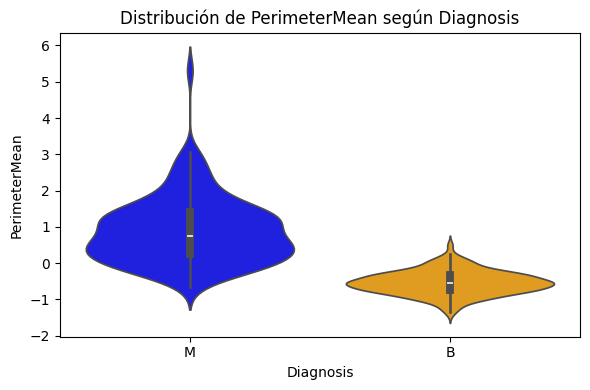

<ipython-input-67-5c01161599ff>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=y['Diagnosis'], y=df[caracteristica], palette={'B': 'orange', 'M': 'blue'})


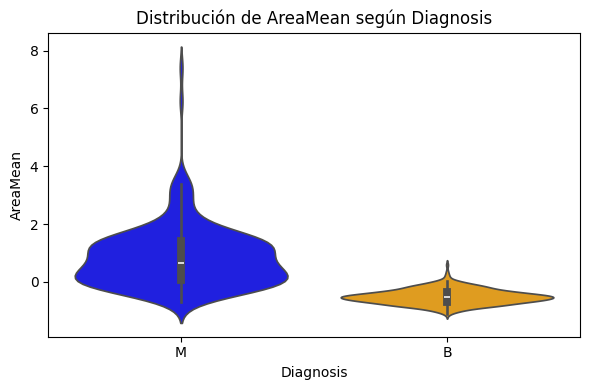

<ipython-input-67-5c01161599ff>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=y['Diagnosis'], y=df[caracteristica], palette={'B': 'orange', 'M': 'blue'})


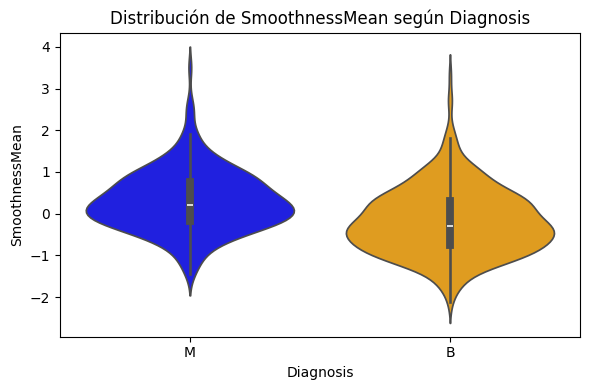

<ipython-input-67-5c01161599ff>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=y['Diagnosis'], y=df[caracteristica], palette={'B': 'orange', 'M': 'blue'})


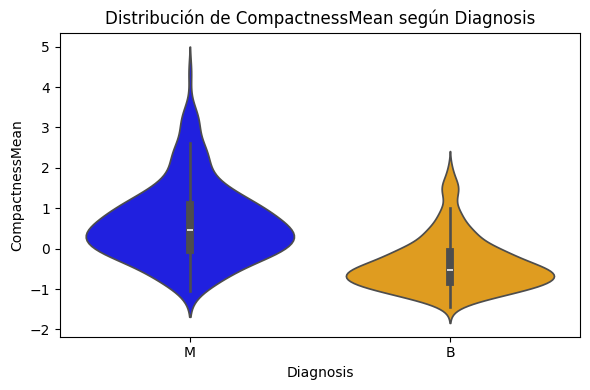

<ipython-input-67-5c01161599ff>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=y['Diagnosis'], y=df[caracteristica], palette={'B': 'orange', 'M': 'blue'})


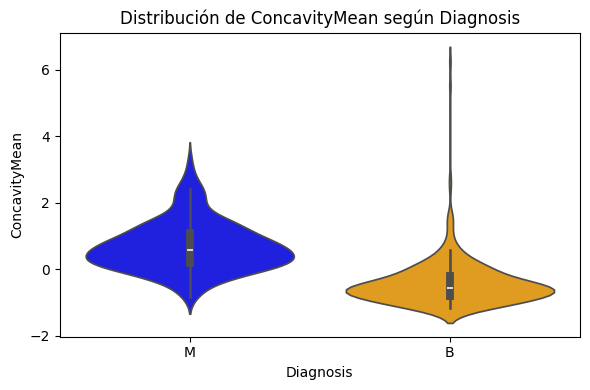

<ipython-input-67-5c01161599ff>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=y['Diagnosis'], y=df[caracteristica], palette={'B': 'orange', 'M': 'blue'})


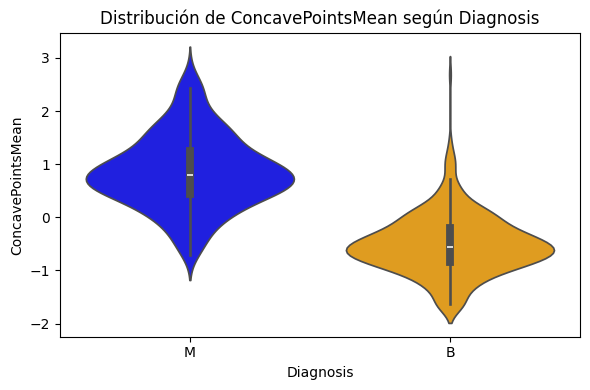

<ipython-input-67-5c01161599ff>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=y['Diagnosis'], y=df[caracteristica], palette={'B': 'orange', 'M': 'blue'})


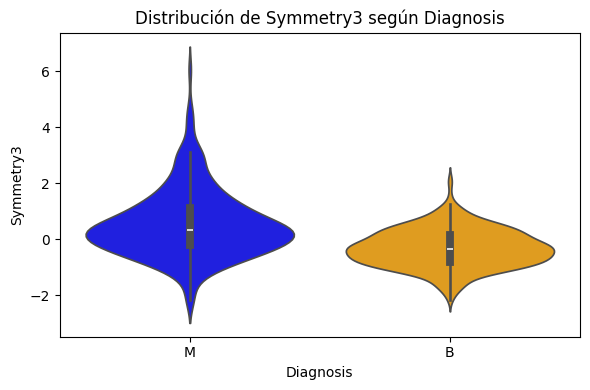

<ipython-input-67-5c01161599ff>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=y['Diagnosis'], y=df[caracteristica], palette={'B': 'orange', 'M': 'blue'})


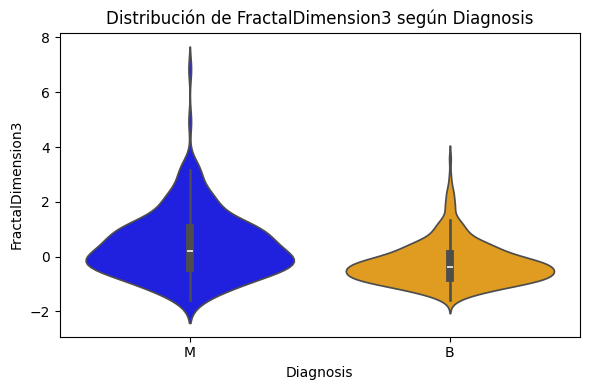

In [67]:

Caracteristicas = [
    'RadiusMean', 'TextureMean', 'PerimeterMean', 'AreaMean',
    'SmoothnessMean', 'CompactnessMean', 'ConcavityMean',
    'ConcavePointsMean', 'Symmetry3', 'FractalDimension3'
]

for caracteristica in Caracteristicas:
    plt.figure(figsize=(6, 4))
    sns.violinplot(x=y['Diagnosis'], y=df[caracteristica], palette={'B': 'orange', 'M': 'blue'})
    plt.xlabel("Diagnosis")
    plt.ylabel(caracteristica)
    plt.title(f"Distribución de {caracteristica} según Diagnosis")
    plt.tight_layout()
    plt.show()


Ahora realizaré el grafico común a todos

In [68]:
df1

Radius1  Texture1  Perimeter1     Area1  Smoothness1  Compactness1  \
0    1.097064 -2.073335    1.269934  0.984375     1.568466      3.283515   
1    1.829821 -0.353632    1.685955  1.908708    -0.826962     -0.487072   
2    1.579888  0.456187    1.566503  1.558884     0.942210      1.052926   
3   -0.768909  0.253732   -0.592687 -0.764464     3.283553      3.402909   
4    1.750297 -1.151816    1.776573  1.826229     0.280372      0.539340   
..        ...       ...         ...       ...          ...           ...   
564  2.110995  0.721473    2.060786  2.343856     1.041842      0.219060   
565  1.704854  2.085134    1.615931  1.723842     0.102458     -0.017833   
566  0.702284  2.045574    0.672676  0.577953    -0.840484     -0.038680   
567  1.838341  2.336457    1.982524  1.735218     1.525767      3.272144   
568 -1.808401  1.221792   -1.814389 -1.347789    -3.112085     -1.150752   

     Concavity1  ConcavePoints1  Symmetry1  FractalDimension1  ...  \
0      2.652874        2.532475   2.217515           2.255747  ...   
1     -0.023846        0.548144   0.001392          -0.868652  ...   
2      1.363478        2.037231   0.939685          -0.398008  ...   
3      1.915897        1.451707   2.867383           4.910919  ...   
4      1.371011        1.428493  -0.009560          -0.562450  ...   
..          ...             ...        ...                ...  ...   
564    1.947285        2.320965  -0.312589          -0.931027  ...   
565    0.693043        1.263669  -0.217664          -1.058611  ...   
566    0.046588        0.105777  -0.809117          -0.895587  ...   
567    3.296944        2.658866   2.137194           1.043695  ...   
568   -1.114873       -1.261820  -0.820070          -0.561032  ...   

     TextureMean  ConcavityMean  SymmetryMean  SmoothnessMean  AreaMean  \
0      -1.332631       1.828809      2.038965        0.887384  1.824397   
1      -0.533026      -0.203792     -0.349316       -0.602642  1.513866   
2      -0.115957       0.810510      0.776325        0.390871  1.398835   
3       0.092436       1.575001      4.548702        2.455843 -0.534288   
4      -1.136277       0.937554     -0.413002        0.661332  1.412437   
..           ...            ...           ...             ...       ...   
564     0.303399       1.092599     -0.937054        0.835531  2.321114   
565     2.131157       0.393939     -0.312893       -0.337594  1.503455   
566     1.054352       0.294727     -0.935027       -0.676471  0.395519   
567     1.753490       2.598944      1.460970        0.927731  1.465964   
568     0.789691      -1.159401     -0.038459       -1.640587 -0.963251   

     ConcavePointsMean  FractalDimensionMean  CompactnessMean  RadiusMean  \
0             1.829790              1.699948         2.405680    1.824496   
1             0.631797             -0.228969        -0.536814    1.378334   
2             1.805686              0.032314         0.983610    1.440145   
3             1.580833              3.964480         3.346862   -0.241333   
4             1.100652             -0.153407         0.059142    1.439805   
..                 ...                   ...              ...         ...   
564           2.005764             -0.490713         0.045849    2.264753   
565           0.935309             -0.841048        -0.160804    1.514025   
566           0.377334             -0.392423         0.324444    0.482846   
567           1.911524              1.389129         3.064903    1.652505   
568          -1.640110             -0.564998        -1.173940   -1.096524   

     Diagnosis  
0            M  
1            M  
2            M  
3            M  
4            M  
..         ...  
564          M  
565          M  
566          M  
567          M  
568          B  

[569 rows x 42 columns]

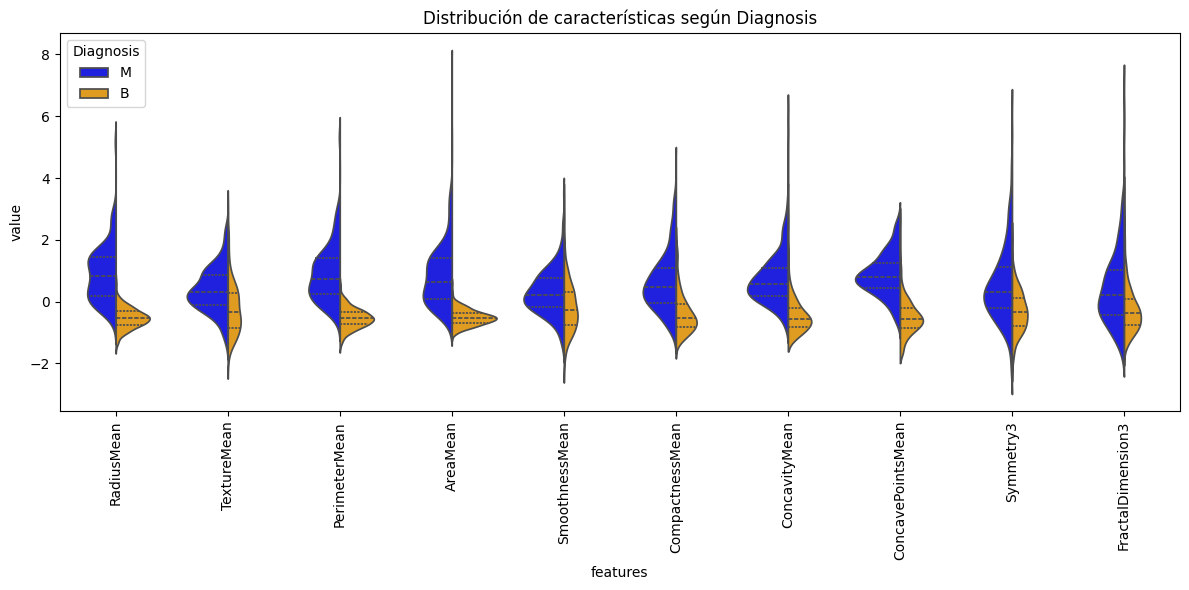

In [69]:
data = pd.melt(df1[Caracteristicas + ['Diagnosis']],
               id_vars="Diagnosis",
               var_name="features",
               value_name="value")

plt.figure(figsize=(12, 6))
sns.violinplot(x="features", y="value", hue="Diagnosis", data=data,
               split=True, inner="quart", palette={'B': 'orange', 'M': 'blue'})
plt.xticks(rotation=90)
plt.title("Distribución de características según Diagnosis")
plt.tight_layout()
plt.show()


## Pregunta 12

12.  Determinar y eliminar los valores atípicos (`outliers`) en la columna `RadiusMean`.

Para identificarlos, construye un gráfico tipo `boxplot`:

```python
df.boxplot(column="RadiusMean", by='Diagnosis', sym='k.', figsize=(18,6))
```

Usa el rango intercuartílico (IQR) para definir los outliers. Los valores fuera del rango [Q1 - 1.5 * IQR, Q3 + 1.5 * IQR] se consideran outliers. Ejemplo de cómo eliminar estos valores:

```python
Q1 = df['edad'].quantile(0.25)
Q3 = df['edad'].quantile(0.75)
IQR = Q3 - Q1
df = df[~((df['edad'] < (Q1 - 1.5 * IQR)) | (df['edad'] > (Q3 + 1.5 * IQR)))]
```

Otra alternativa es utilizar el puntaje Z para detectar `outliers`:

```python
df = df[(np.abs(stats.zscore(df['edad'])) < 3)]
```


<Axes: title={'center': 'RadiusMean'}, xlabel='Diagnosis'>

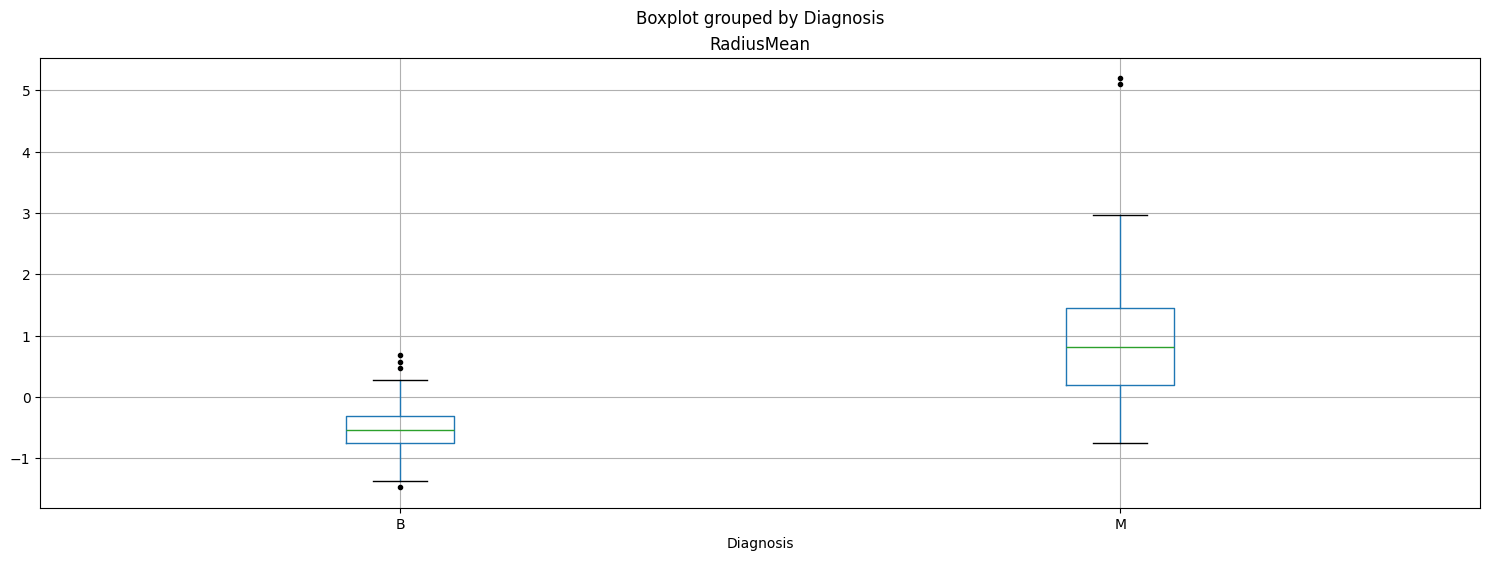

In [70]:
df1.boxplot(column="RadiusMean", by='Diagnosis', sym='k.', figsize=(18,6))

In [71]:
Q1 = df1['RadiusMean'].quantile(0.25)
Q3 = df1['RadiusMean'].quantile(0.75)

IQR = Q3 - Q1
df1 = df1[~((df1['RadiusMean'] < (Q1 - 1.5 * IQR)) | (df1['RadiusMean'] > (Q3 + 1.5 * IQR)))]


<Axes: title={'center': 'RadiusMean'}, xlabel='Diagnosis'>

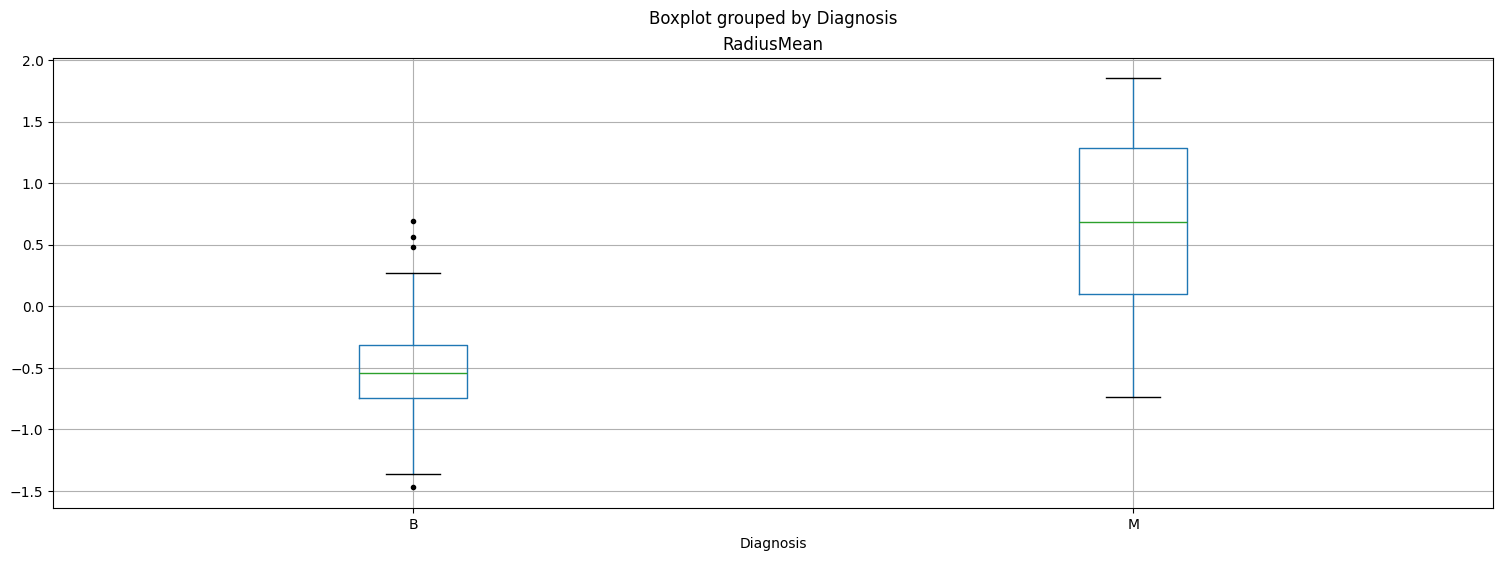

In [72]:
df1.boxplot(column="RadiusMean", by='Diagnosis', sym='k.', figsize=(18,6))

Ahí se observa basicamente que está quitando los datos con la caracteistica maligno, sin embargo esto solo quita a los datos que están mas alejados sin tener en cuenta la caracteristica diagnostico, así que lo que realizaré será una regregación por grupos que contengan la caracteristica M y B para luego aplicar el filtro y quitar los datos atipicos

In [73]:
caracte=['M','B']

datos_filtrados = []

for i in caracte:
  grupo=df1[df1['Diagnosis']==i]
  Q1 = grupo['RadiusMean'].quantile(0.25)
  Q3 = grupo['RadiusMean'].quantile(0.75)
  IQR = Q3 - Q1
  grupofiltrado = grupo[~((grupo['RadiusMean'] < (Q1 - 1.5 * IQR)) | (grupo['RadiusMean'] > (Q3 + 1.5 * IQR)))]
  datos_filtrados.append(grupofiltrado)

df1=pd.concat(datos_filtrados)

<Axes: title={'center': 'RadiusMean'}, xlabel='Diagnosis'>

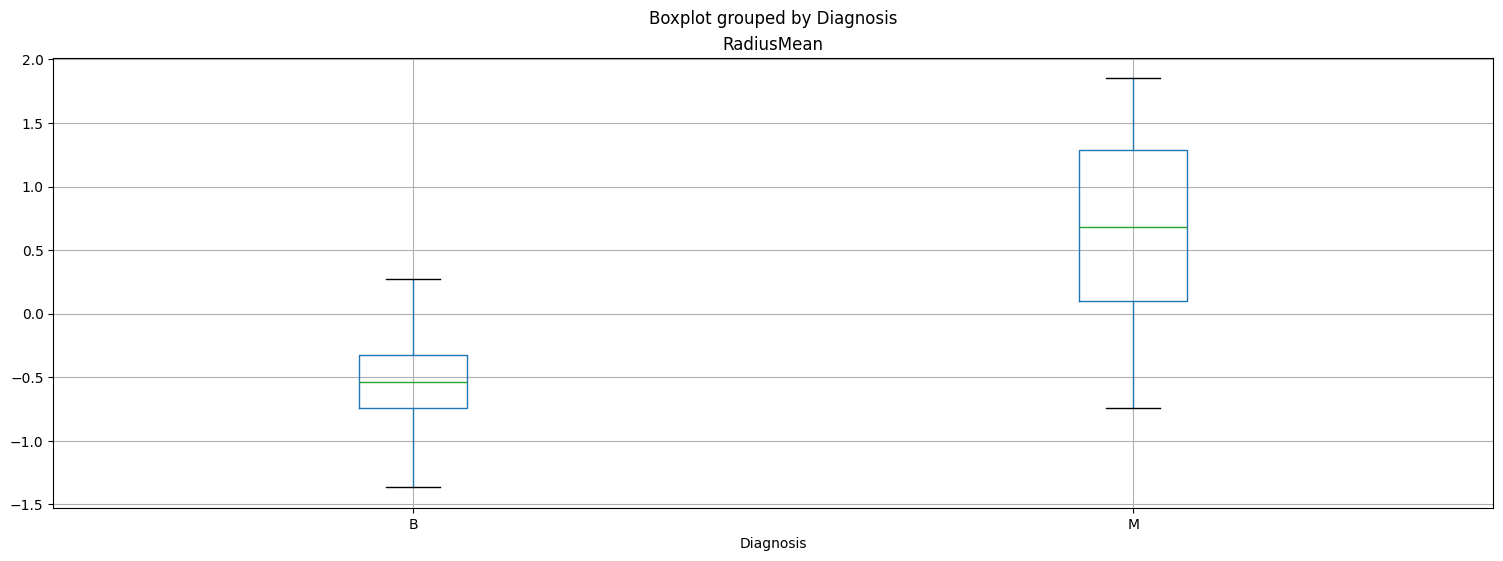

In [74]:
df1.boxplot(column="RadiusMean", by='Diagnosis', sym='k.', figsize=(18,6))

Por tanto ahí se abrian eliminado todos los datos atipicos. Lo unico que hay que tener en cuenta con el metodo utilizado es que al concatenar los datos se "perdió" en escencia el orden original, pues primero van los datos con caracteristica M y luego los de caracteristica B

## Pregunta 13


13.Encontrar la matrix de correlación, emplear el metodo corr(), dentro de seaborn buscar el metodo heatmap() para realizar un grafico de la matrix de correlación.



Como no se especifica sobre que datos, veamos como se ve la matriz de correlación de todos los datos

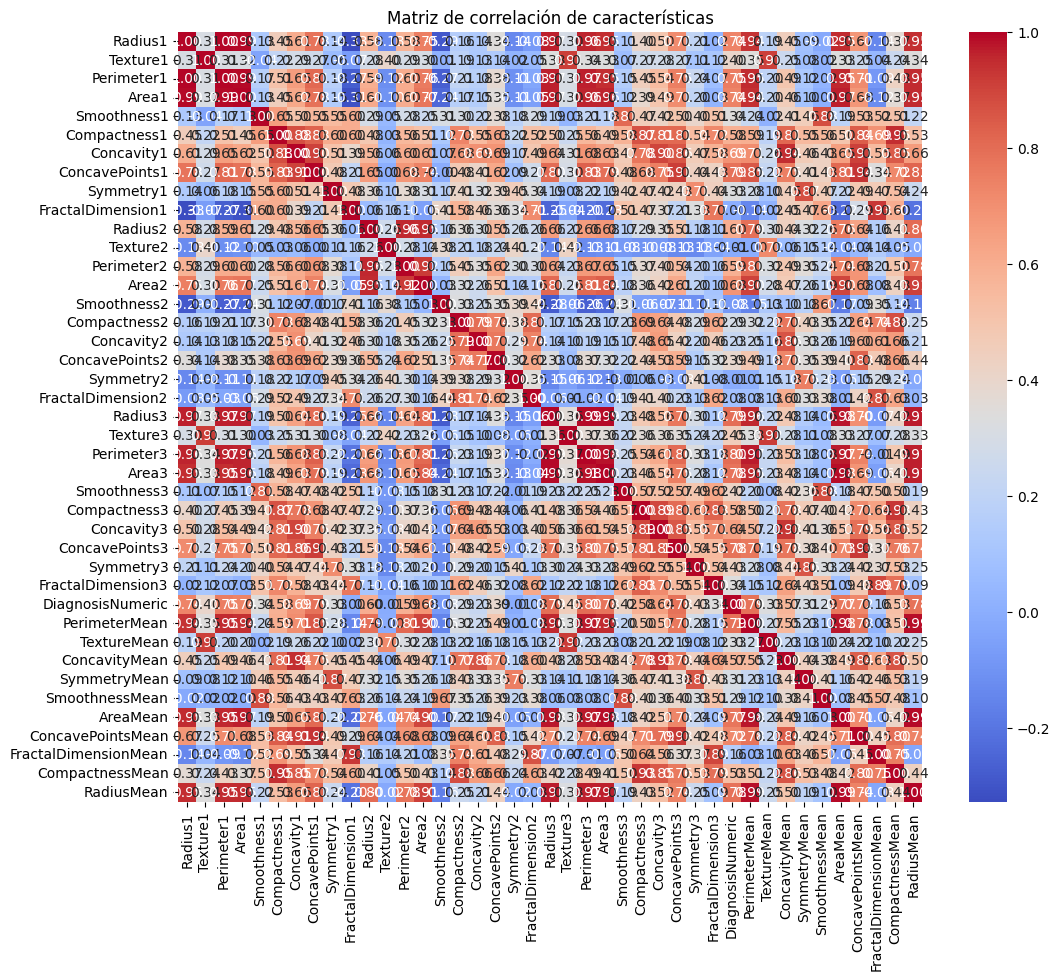

In [75]:
df_corr = df1.drop(columns=['Diagnosis'])
corr_matrix = df_corr.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de correlación de características")
plt.show()


Resulta que no se entiende es nada, así que solo le sacaré la matriz de correlación a algunos, en Particular a los Mean sacados en putnos anteriores

In [76]:
Caracteristicas

['RadiusMean',
 'TextureMean',
 'PerimeterMean',
 'AreaMean',
 'SmoothnessMean',
 'CompactnessMean',
 'ConcavityMean',
 'ConcavePointsMean',
 'Symmetry3',
 'FractalDimension3']

In [77]:
df2=df1[Caracteristicas].copy()

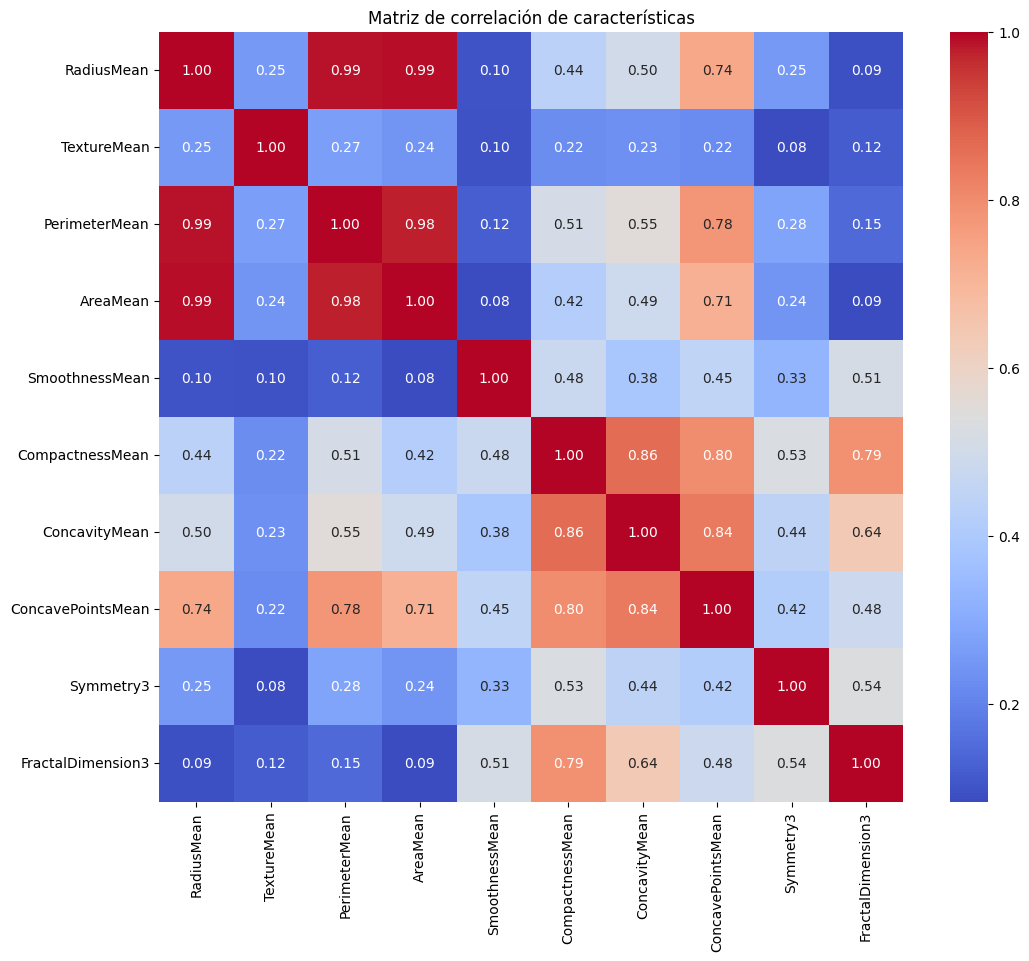

In [78]:
df_corr = df2.copy()
corr_matrix = df_corr.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de correlación de características")
plt.show()


De esta forma se encuentra una relación pictorica mas accesible.

## Pregunta 14


14.¿Que otro tipo de gráficos pueden ser realizados para entender mejor los datos?

Se pueden realizar disintas graficas, la que primero se me ocurre son graficas de dispersión haber si tienen alguna relación especifica entre variables. Además estas se pueden realizar segregando las caracteristicas de si son malignos o benignos. Se puede usar un scatterplot para esto

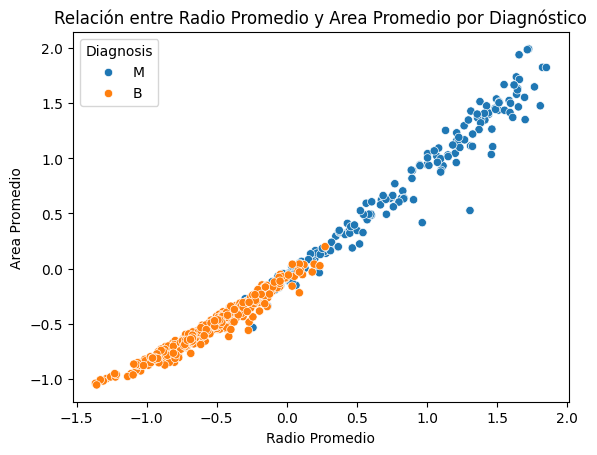

In [79]:
sns.scatterplot(data=df1, x='RadiusMean', y='AreaMean', hue='Diagnosis')
plt.xlabel('Radio Promedio')
plt.ylabel('Area Promedio')
plt.title('Relación entre Radio Promedio y Area Promedio por Diagnóstico')
plt.show()


Auqnue una generalización para ver graficas de dispersión y mostrar si hay o no relación entre las distintas columnas existentes (solo las Mean, pues si cogiese todas seria dificil su viazualización) es usando pairplot

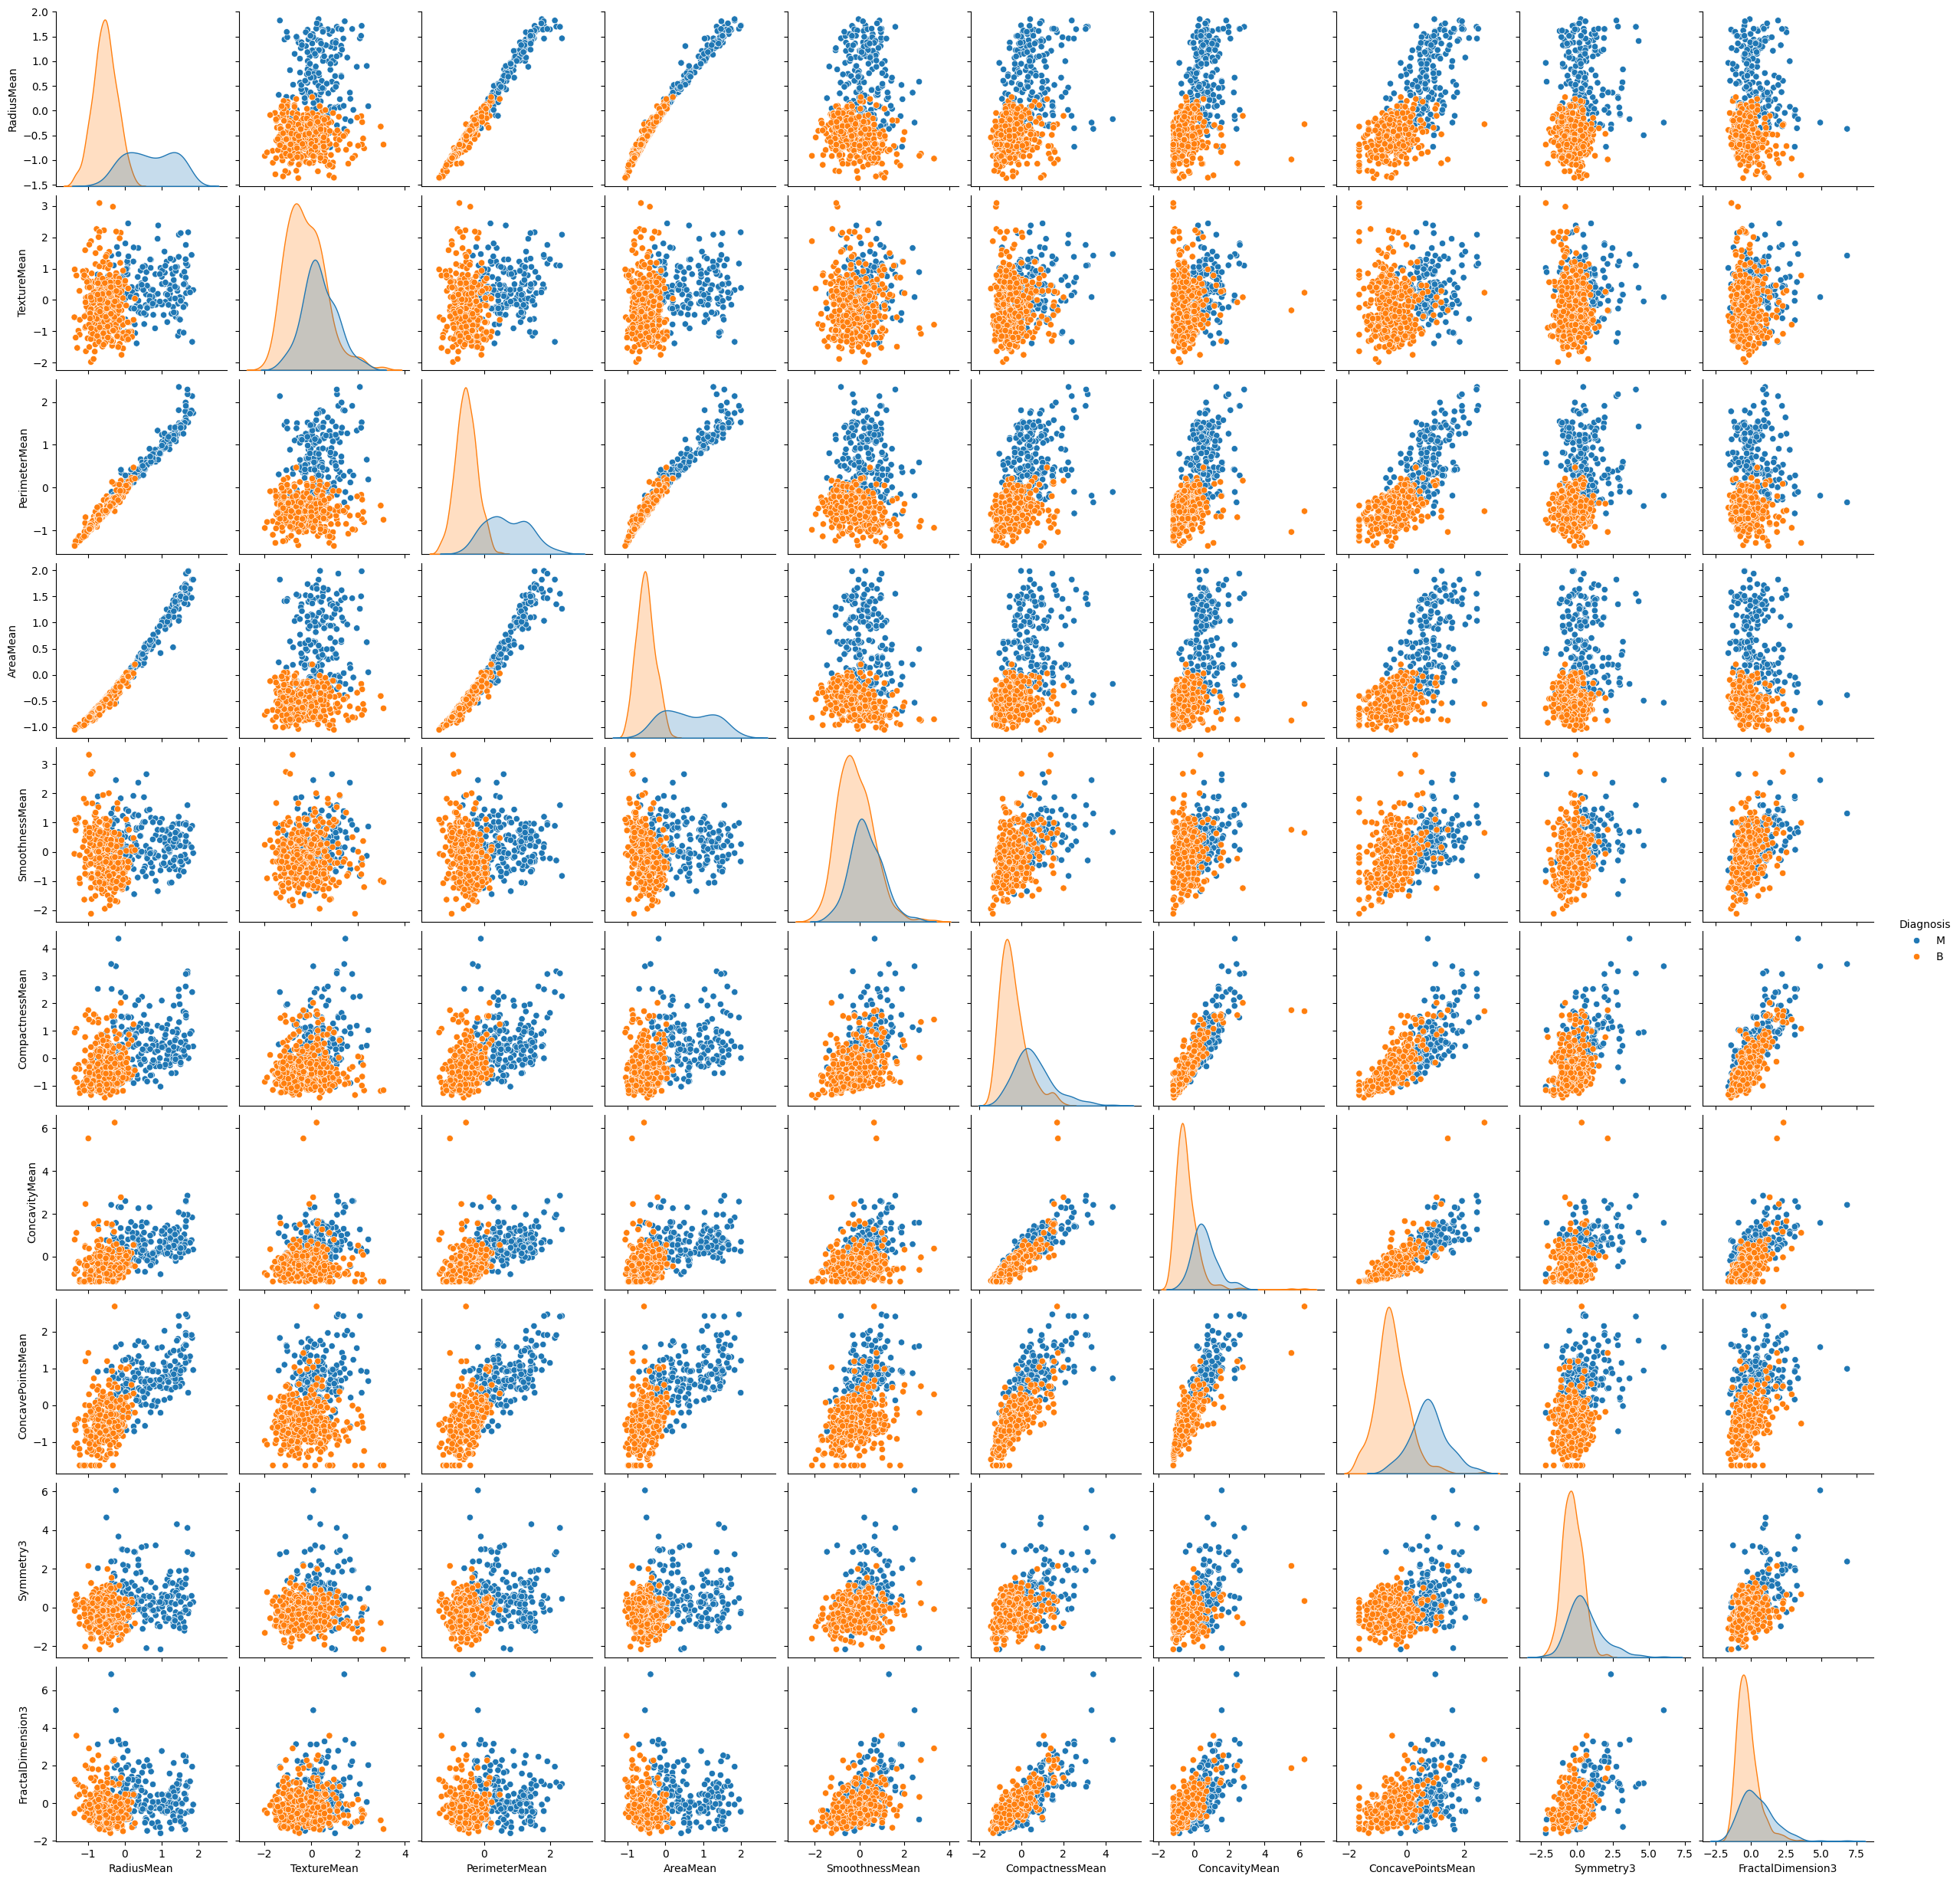

In [80]:
sns.pairplot(df1[Caracteristicas + ['Diagnosis']], hue='Diagnosis')


También se pueden hacer graficas de barras sobre dichas caracteristicas se gregando por si el tejido es Maligno o Benigno

Text(0.5, 1.0, 'Graficas de Barras')

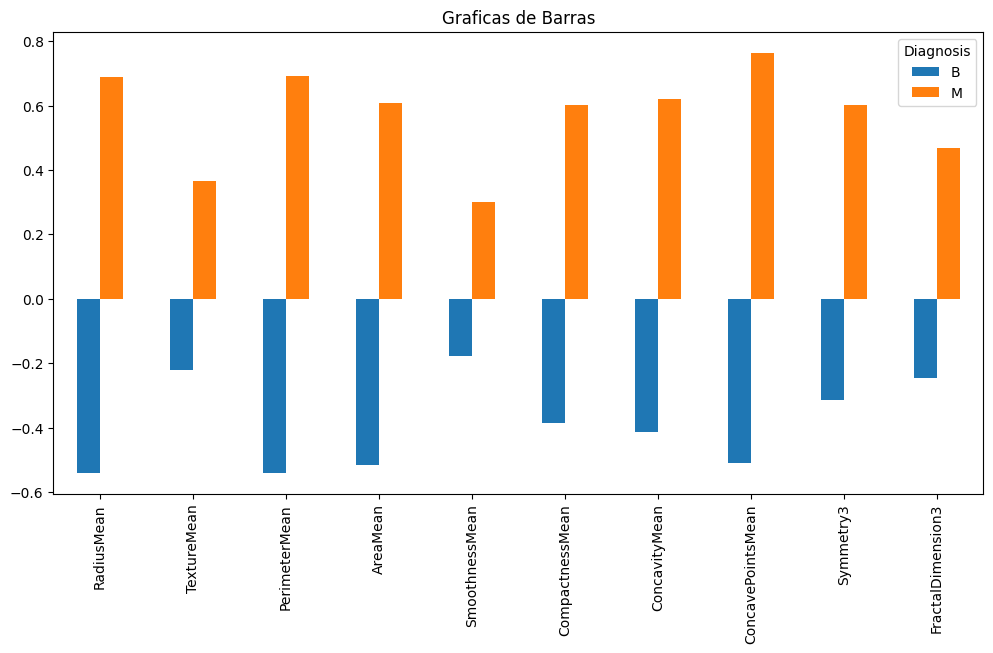

In [81]:
df1.groupby('Diagnosis')[Caracteristicas].mean().T.plot(kind='bar', figsize=(12, 6))
plt.title('Graficas de Barras')


Supongo existiran mas tipos de graficas que se pueden realizar, pero creo que con esas son suficientes, ya que el punto no especifica cuantos debo de poner como ejemplos. Todos estos dan relación entre las distintas columnas categorizando a los tejidos por malignos o benignos, sin embargo también se puedieron realizar sin hacer dicha segregación(a excepcion del ultimo diagrama de barras que puse como ejemplo. pues ahí no tendria sentido si no hubiera tal separación.)